# Classification by Support Vector Machine

**Write and execute R code in the code cells per the instructions.  The expected results are provided for you directly following the code cells.**

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
                                
boundary_line = function(support_vector)
  { edge.1 = support_vector[support_vector$class == levels(support_vector$class)[1], ]
    edge.2 = support_vector[support_vector$class == levels(support_vector$class)[2], ]
    if (nrow(edge.1)==1) { temp = edge.1; edge.1 = edge.2; edge.2 = edge.1 }
    model = lm(as.formula(paste0(colnames(edge.1)[2], "~", colnames(edge.1)[1])), data=edge.1)
    i1 = as.numeric(model$coefficient[1])
    m = as.numeric(model$coefficient[2])
    i3 = as.numeric(edge.2[1,2] - m*edge.2[1,1])
    i2 = mean(c(i1, i3))
    data.frame(intercept=i2, slope=m) }

SyntaxError: invalid syntax (2708753783.py, line 1)

## Choice of Kernel

### Data

Here is a dataset of 6 classified observations and a new dataset of 2 unclassified observations for use in problems 1, 2, and 3.

x1,class
2.3,A
2.5,A
4.0,A
6.5,B
8.5,B
9.1,A


x1
6.1
6.4


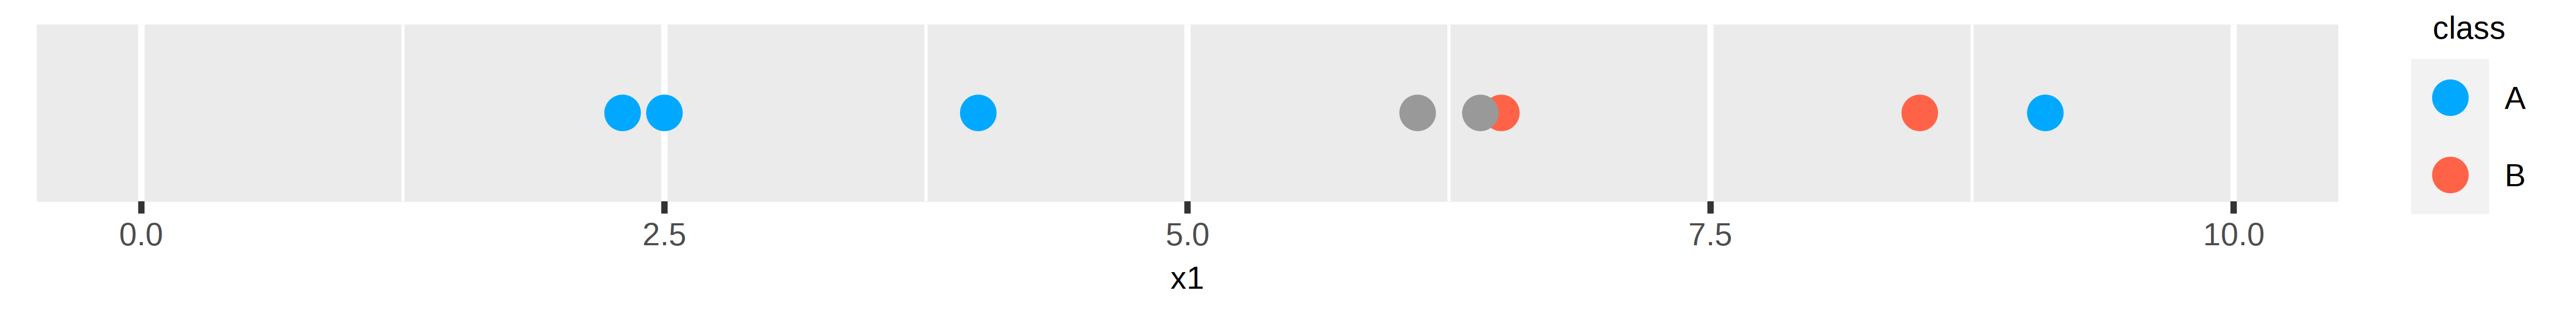

In [2]:
data = data.frame(x1=c(2.3, 2.5, 4.0, 6.5, 8.5, 9.1), class=factor(c("A", "A", "A", "B",  "B", "A"), levels=c("A","B")))
new  = data.frame(x1=c(6.1, 6.4))
fmt(data)
fmt(new)

out(8, 1)
ggplot(data) + xlim(0,10) +
geom_point(aes(x=x1, y=0, color=class)) +
geom_point(aes(x=x1, y=0), data=new, color=NEW_COLOR) +
theme.x_axis_only + theme.legend_title

### Problem 1

Add a synthetic variable `y` to the classified and unclassified datasets, calculated as the radial basis (Gaussian) of variable `x1`.  Set radial_center=7.7, gamma=0.5.

You may want to use these function(s):
* gaussian()

Use `fmt(..., row.names=TRUE)` to display a table with row numbers.<br>
Use `gaussian(..., ..., ...)` to calculate the result of the gaussian function, where the 1st argument is a vector of values, the 2nd argument is the mean (radial center) or the values, and the 3rd argument is the standard deviation ($\sqrt{\frac{1}{2gamma}}$) of the values.<br>

In [3]:
x1 = data$x1
y = gaussian(data$x1, 7.7, 1)
class = data$class
Problem.1 = data.frame(x1, y, class)
fmt(Problem.1, "data", row.names=TRUE)

x1 = new$x1
y = gaussian(new$x1, 7.7, 1)
new = data.frame(x1, y)


fmt(new, row.names=TRUE)

,x1,y,class
1,2.3,0.0000002,A
2,2.5,0.0000005,A
3,4.0,0.0004248,A
4,6.5,0.1941861,B
5,8.5,0.2896916,B
6,9.1,0.1497275,A


,x1,y
1,6.1,0.1109208
2,6.4,0.1713686


Show the classified 3-variable dataset as a 2-axis scatterplot, color-coded by class.  

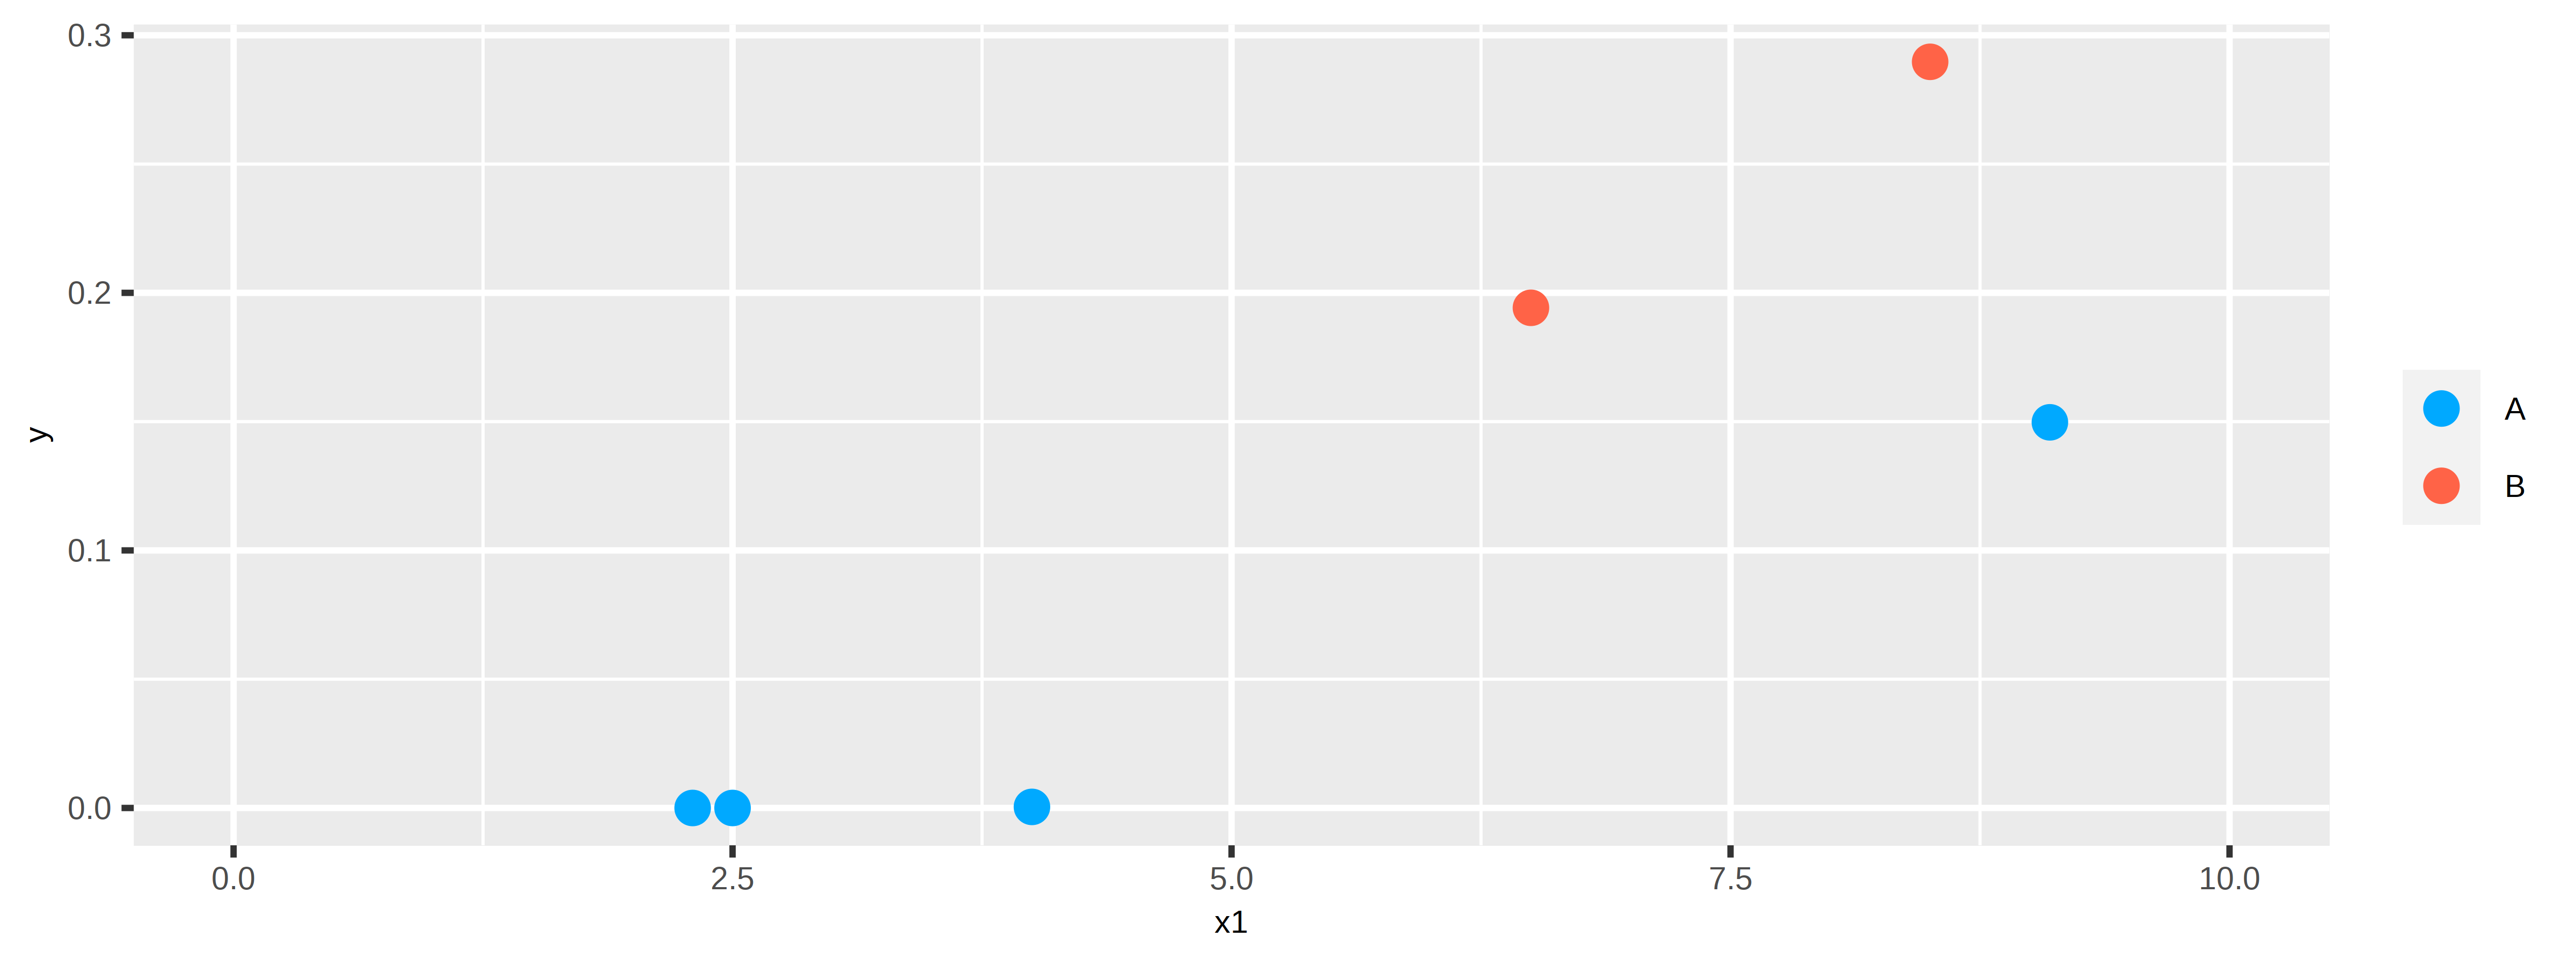

In [4]:
out(8,3)
ggplot(Problem.1) + xlim(0,10) + xlab("x1") + ylab("y") + geom_point(aes(x=x1, y=y, color=class)) 

Note that the classified 3-variable dataset is linearly separable.  Identify (do not calculate) the support vectors.  Overlay onto the scatterplot the support vectors circled in black and the boundary line that maximizes the margin between classes.

You may want to use these function(s):
* boundary_line()
* geom_point()
* geom_abline()

Use `boundary_line(...)` to get the intercept and slope of the boundary line, where the argument is a data frame of 3 support vectors represented with x1, y, and class variables.  `boundary_line(...)$intercept` provides the intercept.  `boundary_line(...)$slope` provides the slope.<br>
Use `geom_point(..., data=..., shape=1, size=6, color="black")` to construct a layer of black hollow circles.<br>
Use `geom_abline(aes(intercept=..., slope=...))` to construct a layer with a line.

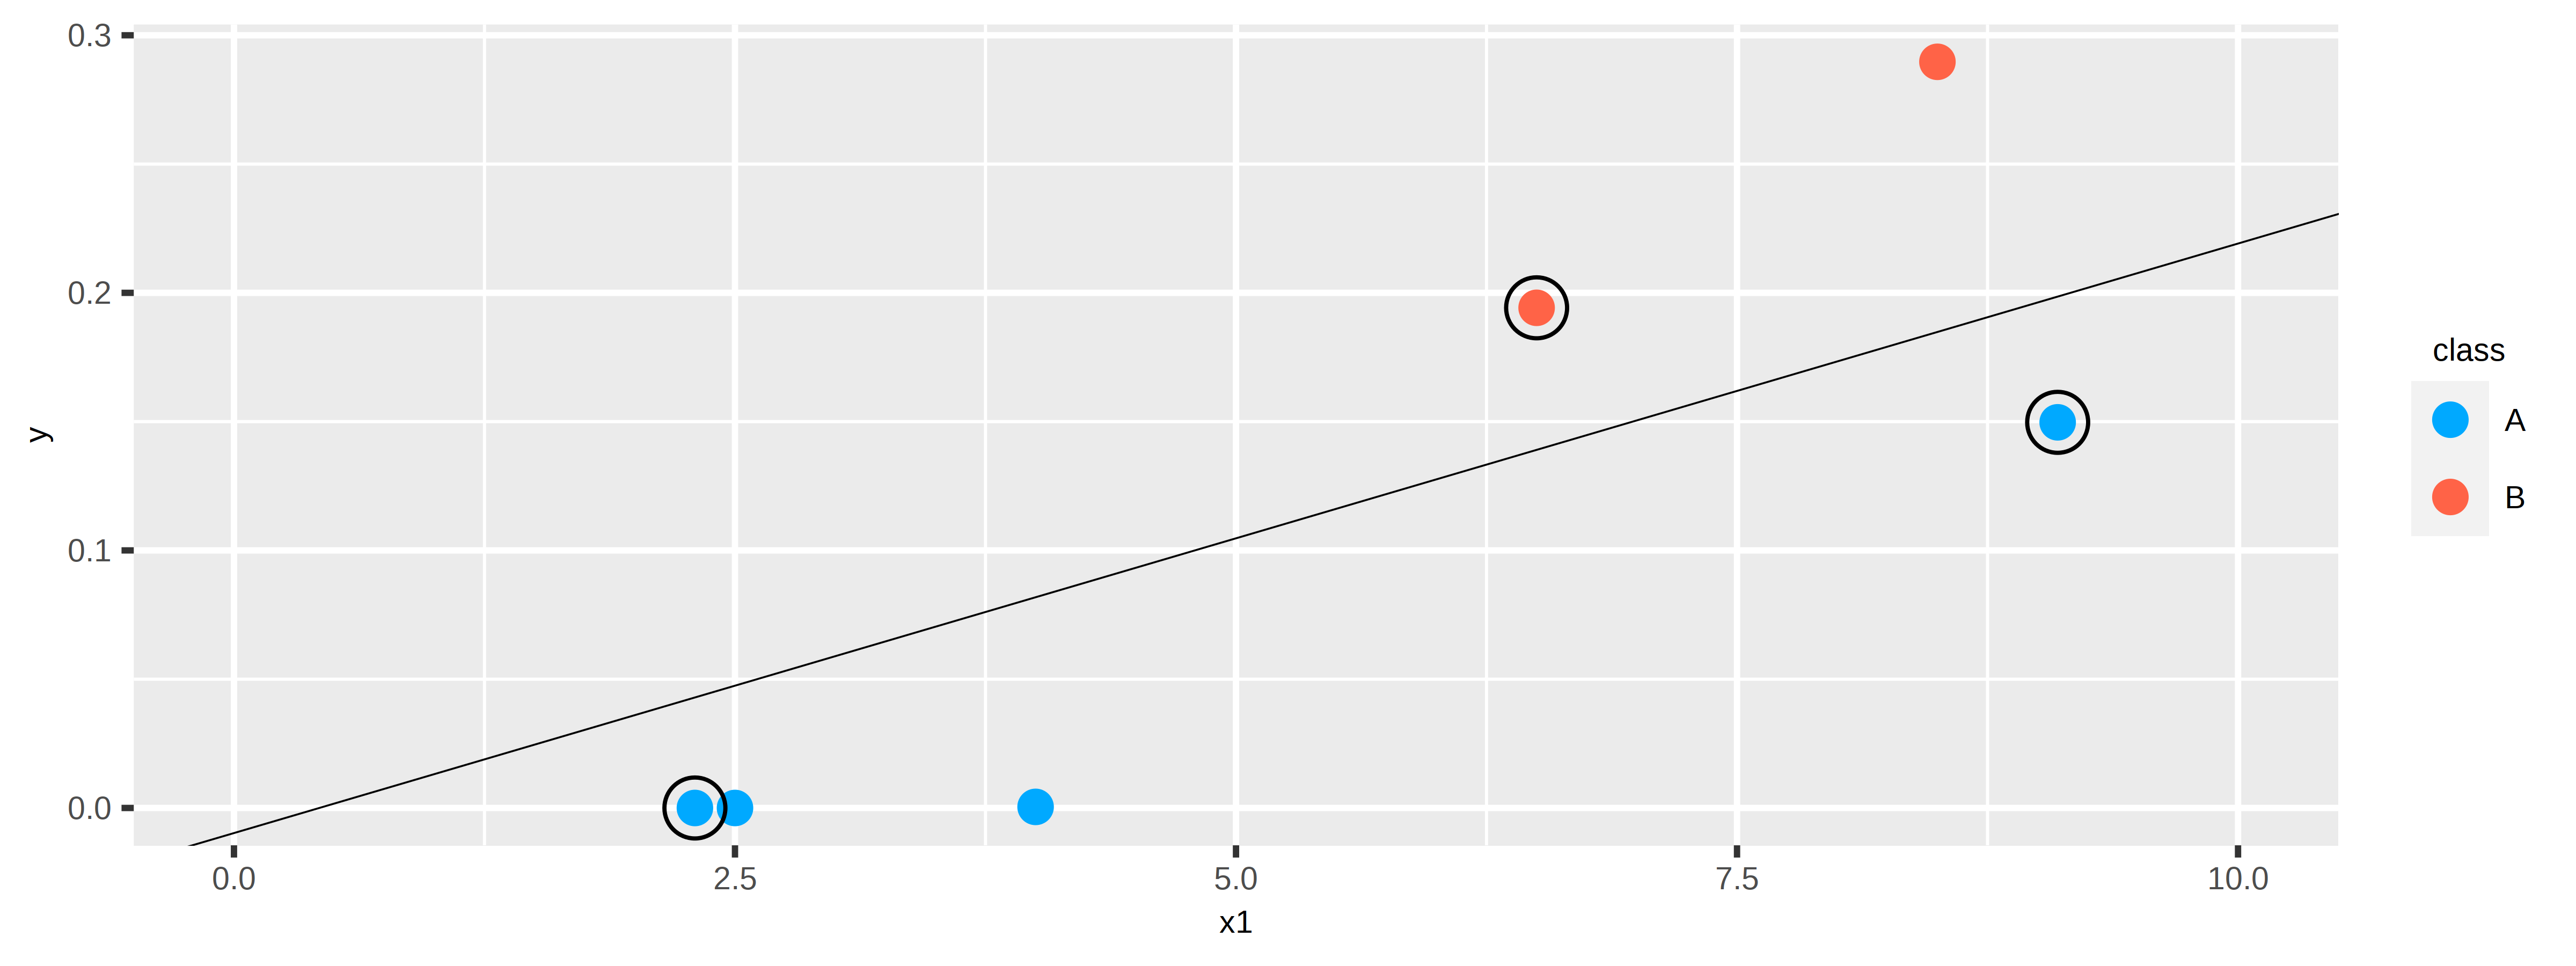

In [5]:
support_vectors = c(2.3, 6.5, 9.1)
BL = boundary_line(Problem.1)

out(8,3)
ggplot(Problem.1) + xlim(0,10) + xlab("x1") + ylab("y") + geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=Problem.1[Problem.1$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_abline(aes(intercept=BL$intercept, slope=BL$slope)) + 
theme.legend_title

In [6]:
boundary_line(Problem.1)

intercept,slope
<dbl>,<dbl>
-0.009732398,0.02288739


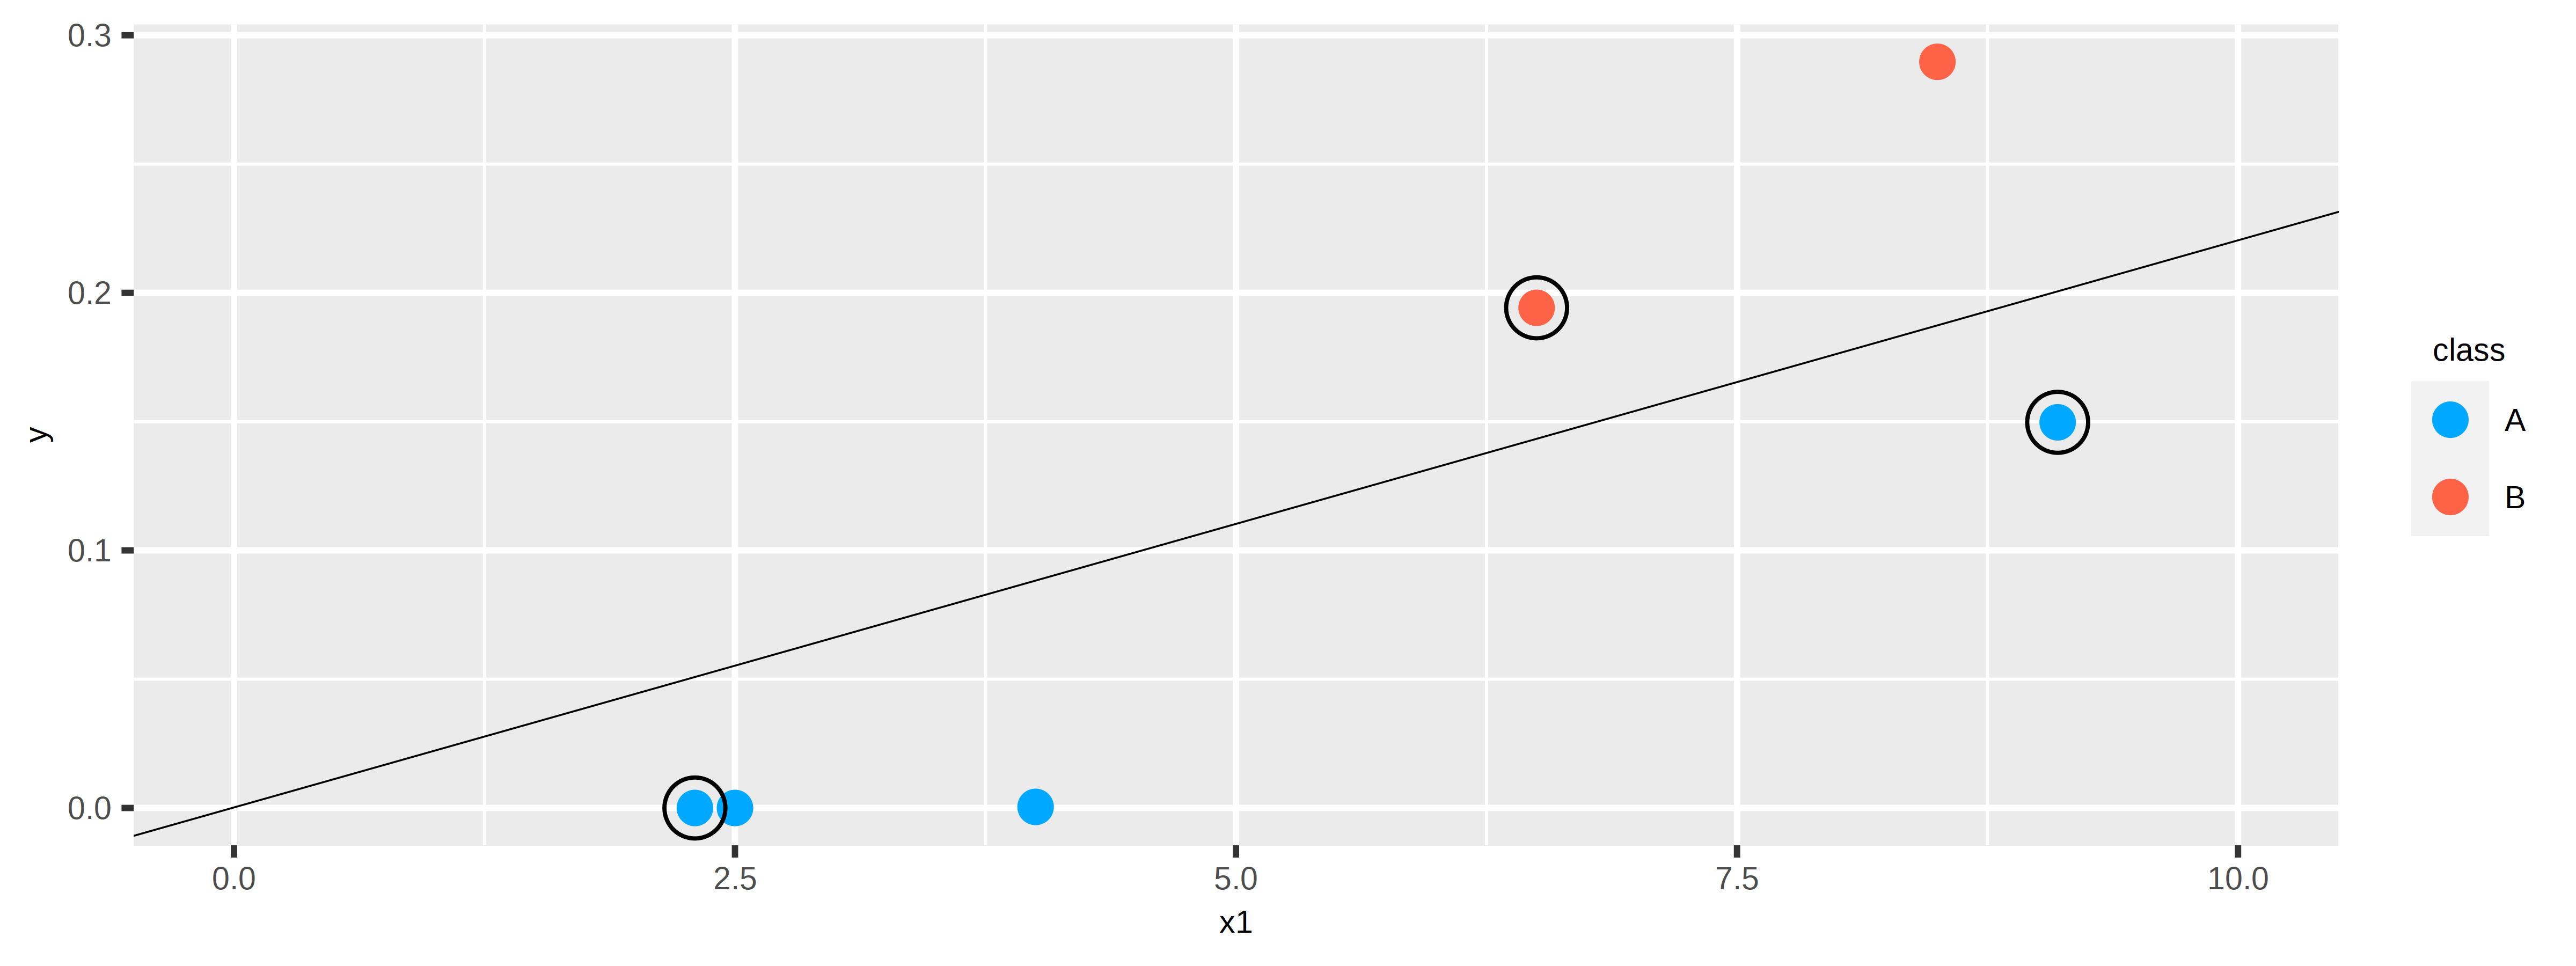

In [7]:

support_vectors = c(2.3, 6.5, 9.1)

m = (Problem.1$y[6] - Problem.1$y[1]) / (Problem.1$x1[6] - Problem.1$x1[1])
i.upper = -m*Problem.1$x1[4]+Problem.1$y[4]
i.lower = -m*Problem.1$x1[1]+Problem.1$y[1]
i = mean(c(i.upper, i.lower))
out(8,3)
ggplot(Problem.1) + xlim(0,10) + xlab("x1") + ylab("y") + geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=Problem.1[Problem.1$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_abline(aes(intercept=i, slope=m)) + 
theme.legend_title

Identify (do not calculate) the predicted classes of observations in the new unclassified dataset.  Overlay onto the scatterplot the unclassified 2-variable dataset, color-coded by predicted class and circled in gold, assuming cutoff 0.50 for class A. 

You may want to use these function(s):
* geom_point()

Use `geom_point(..., data=..., size=6, color="gold")` to construct a layer of gold circles.

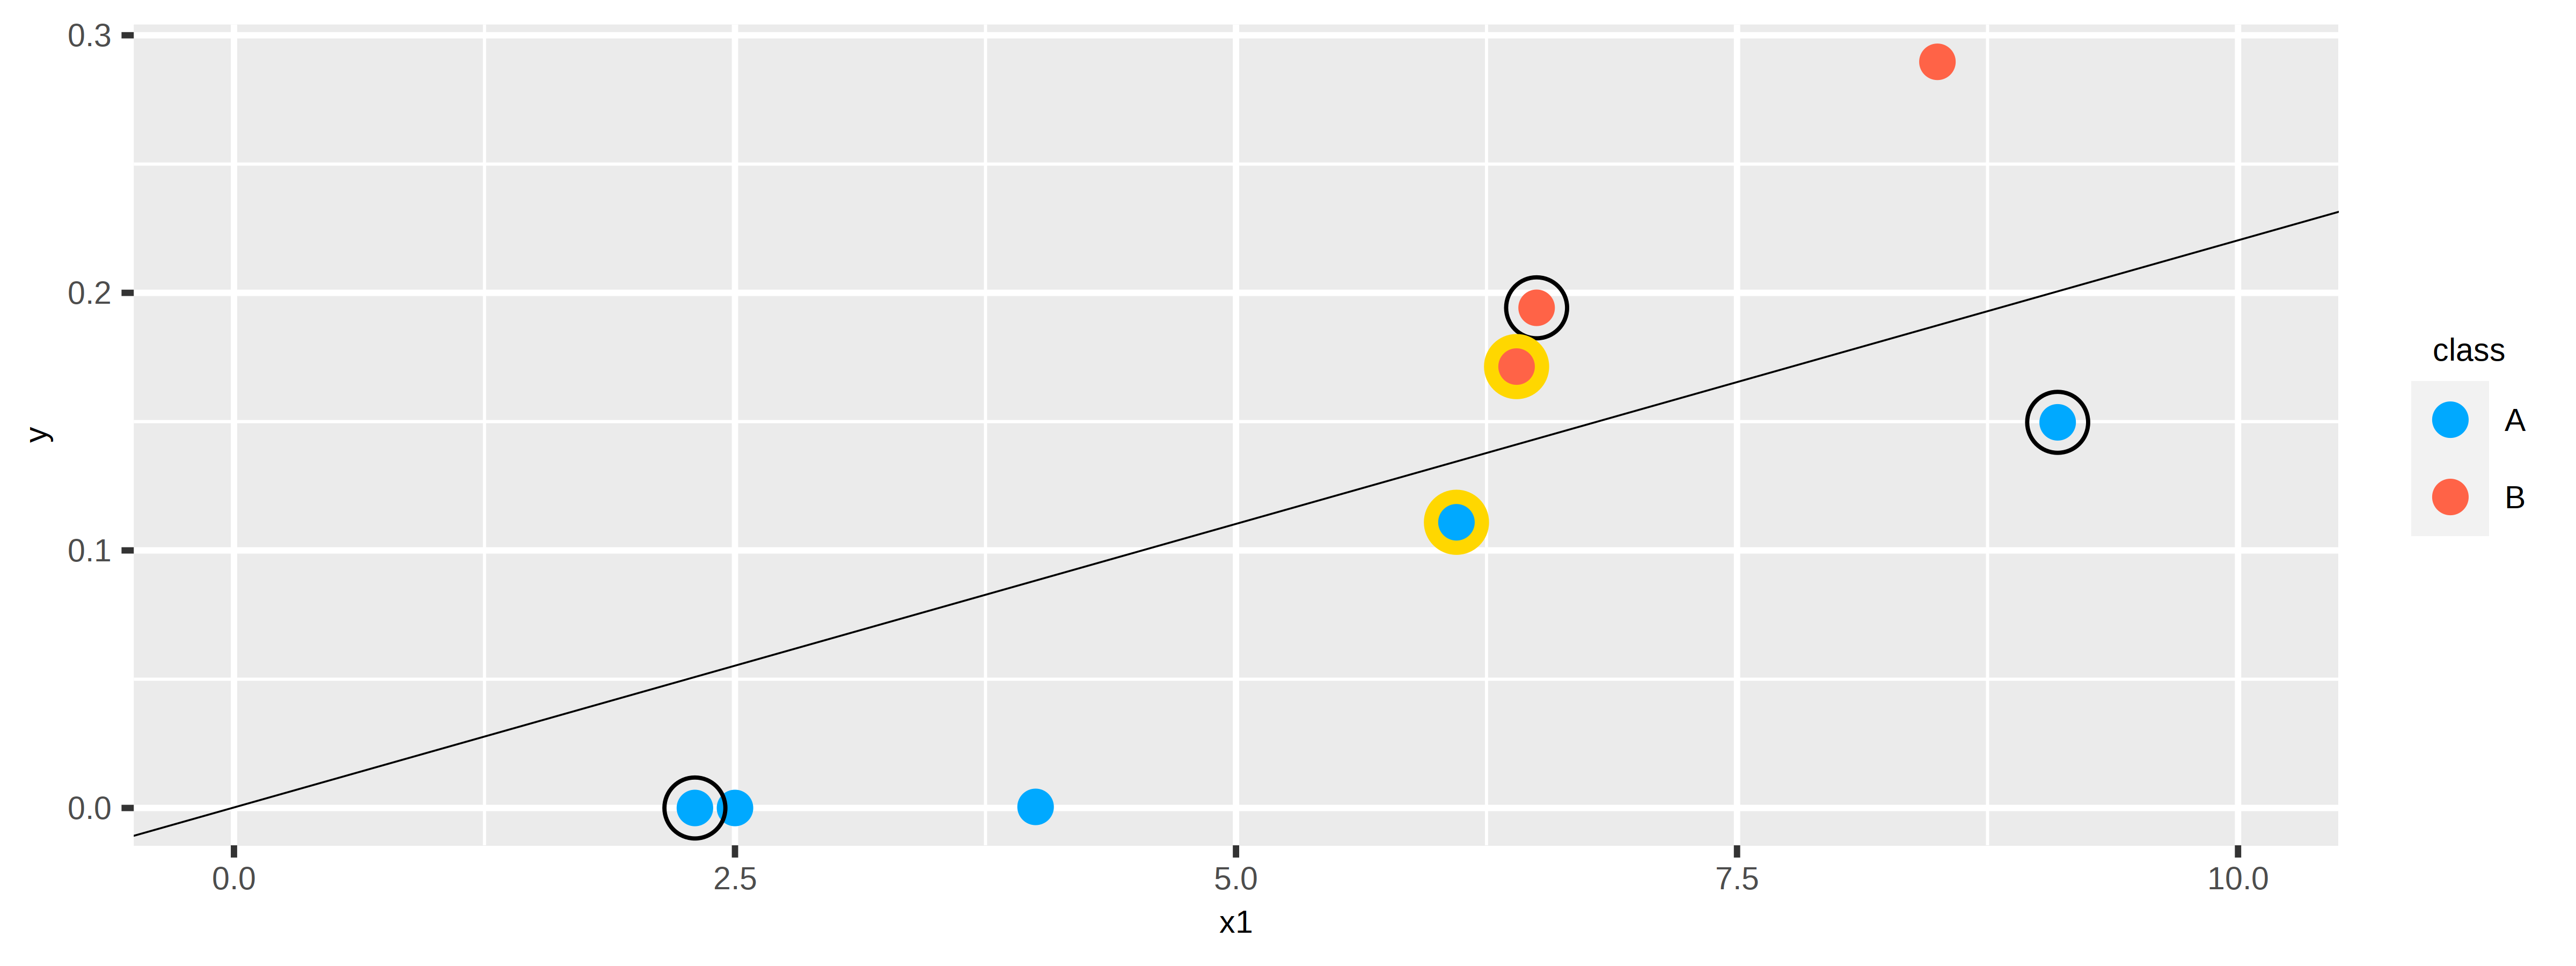

In [8]:
data.score = -(m*Problem.1$x1 -1*Problem.1$y + i)*100 / sqrt(m^2 + (-1)^2)
new.score = -(m*new$x1 -1*new$y + i)*100 / sqrt(m^2 + (-1)^2)
new_color = ifelse(new.score<0, PALETTE[1], PALETTE[2])
    
out(8,3)
ggplot(Problem.1) + xlim(0,10) + xlab("x1") + ylab("y") + geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=Problem.1[Problem.1$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_point(aes(x=x1, y=y), data=new, size=6, color="gold") +
geom_point(aes(x=x1, y=y), data=new, color=new_color) +
geom_abline(aes(intercept=i, slope=m)) + 

theme.legend_title

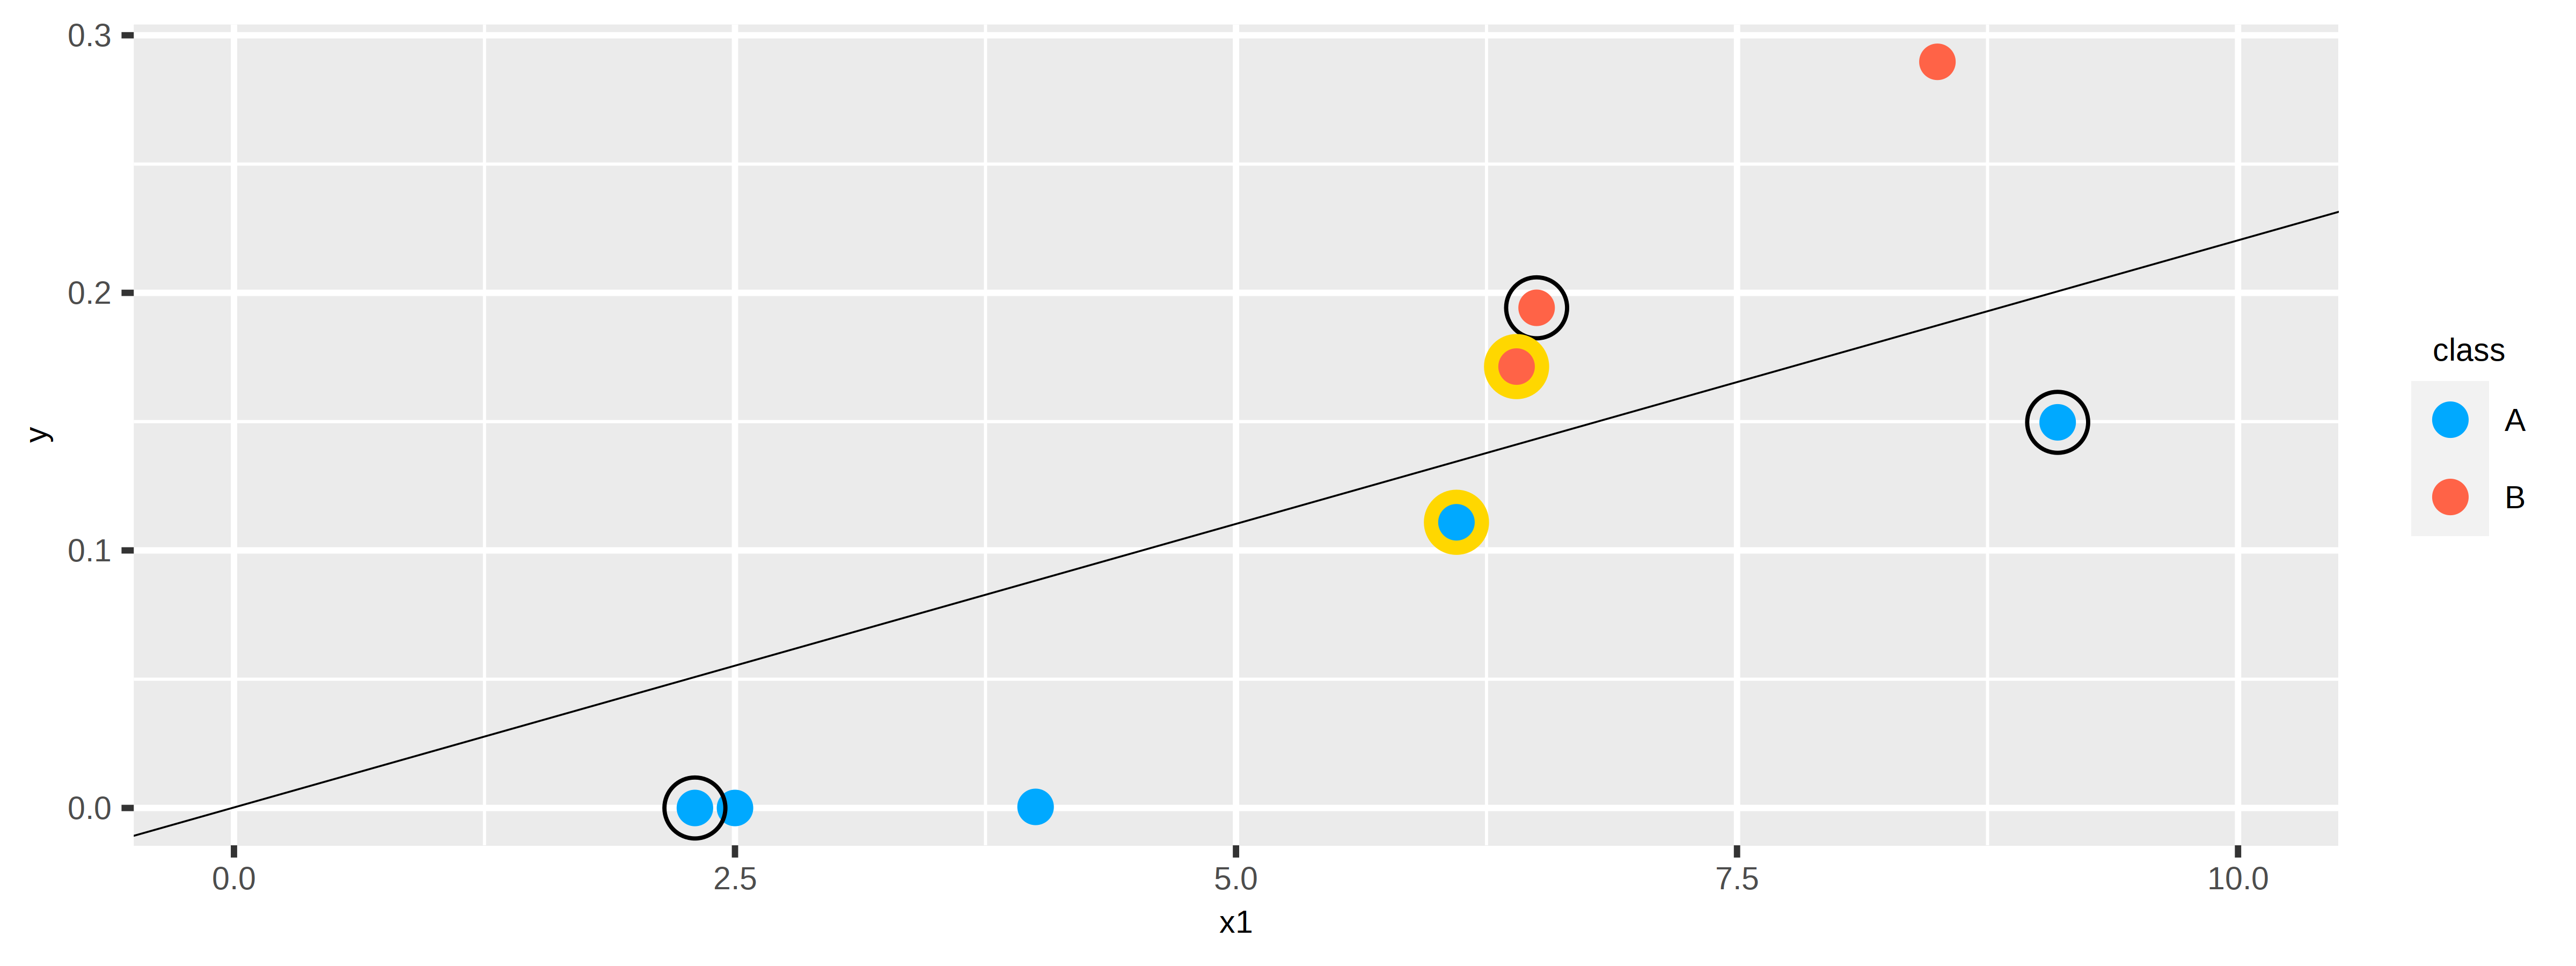

In [9]:
out(8,3)
ggplot(Problem.1) + xlim(0,10) + xlab("x1") + ylab("y") + geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=Problem.1[Problem.1$x1 %in% support_vectors,], shape=1, size=6, color="black") +

geom_point(aes(x=x1, y=y), data=new, size=6, color="gold") +
geom_point(aes(x=x1, y=y), data=new, color=new_color) +
geom_abline(aes(intercept=i, slope=m)) + 

theme.legend_title

Show the classified and unclassified datasets as a 1-axis scatterplot, color-coded by class or predicted class.  Circle the new observations in gold.  Circle the support vectoirs in black.

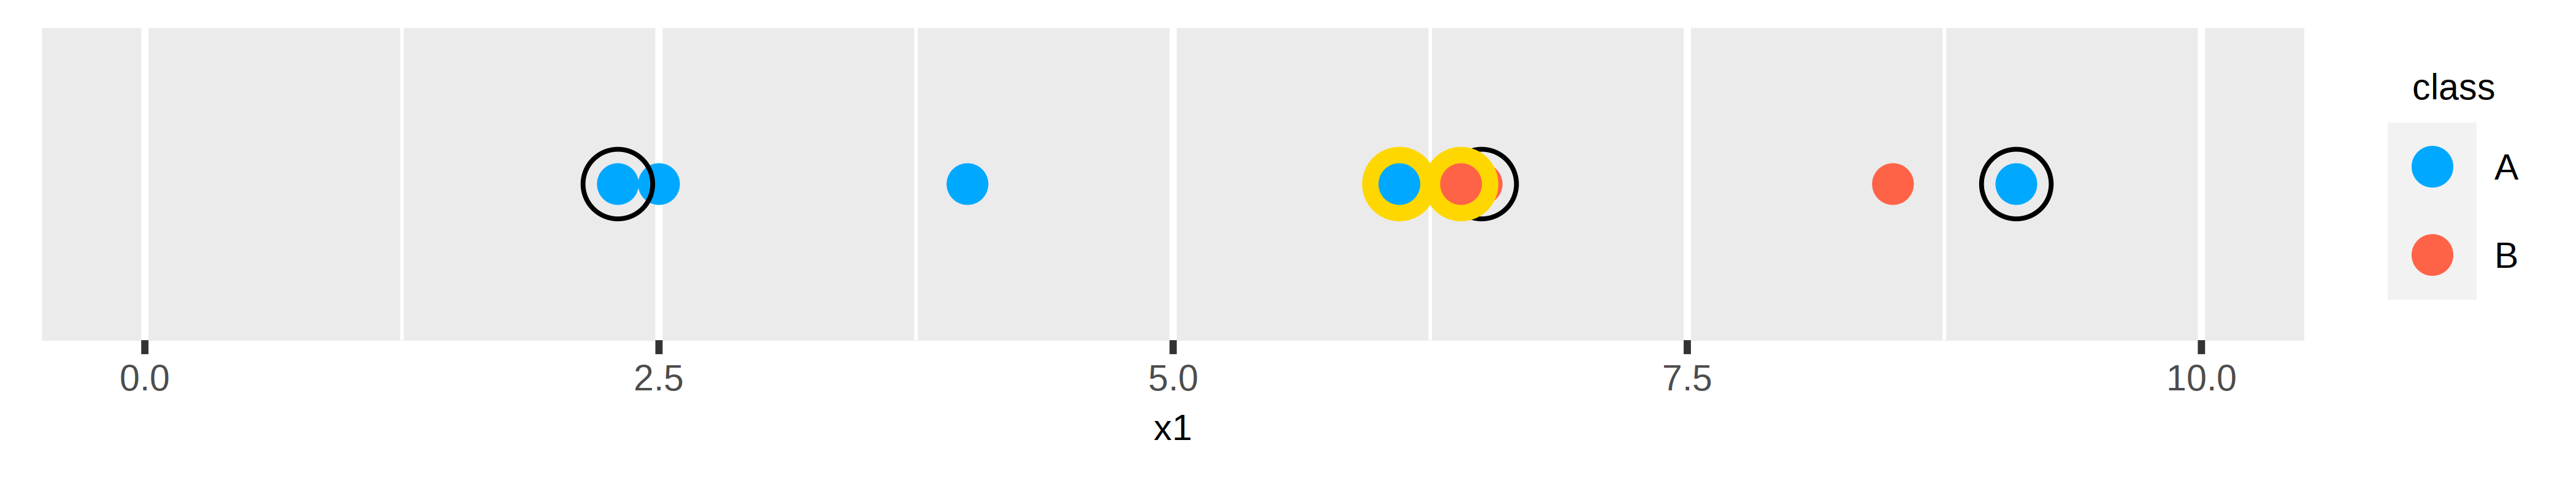

In [10]:
out(7,1.3)
ggplot(Problem.1) + xlim(0,10) + ylim(-.5,.5) + geom_point(aes(x=x1, y=0, color=class)) +
geom_point(aes(x=x1, y=0), data=Problem.1[Problem.1$x1 %in% support_vectors,], shape=1, size=6, color="black") +

geom_point(aes(x=x1, y=0), data=new, size=6, color="gold") +
geom_point(aes(x=x1, y=0), data=new, color=new_color) + 


theme.legend_title + theme.x_axis_only

### Problem 2

Repeat the analysis done in problem 1, except set radial_center=6, gamma=0.1.  

In [11]:
x1 = data$x1
y = gaussian(data$x1, 6, (1/.2)^.5)
class = data$class
Problem.2 = data.frame(x1, y, class)
fmt(Problem.2, "data", row.names=TRUE)

x1 = new$x1
y = gaussian(new$x1, 6, (1/.2)^.5)
new = data.frame(x1, y)


fmt(new, row.names=TRUE)

,x1,y,class
1,2.3,0.0453812,A
2,2.5,0.0524100,A
3,4.0,0.1195934,A
4,6.5,0.1740074,B
5,8.5,0.0954973,B
6,9.1,0.0682446,A


,x1,y
1,6.1,0.1782341
2,6.4,0.1755805


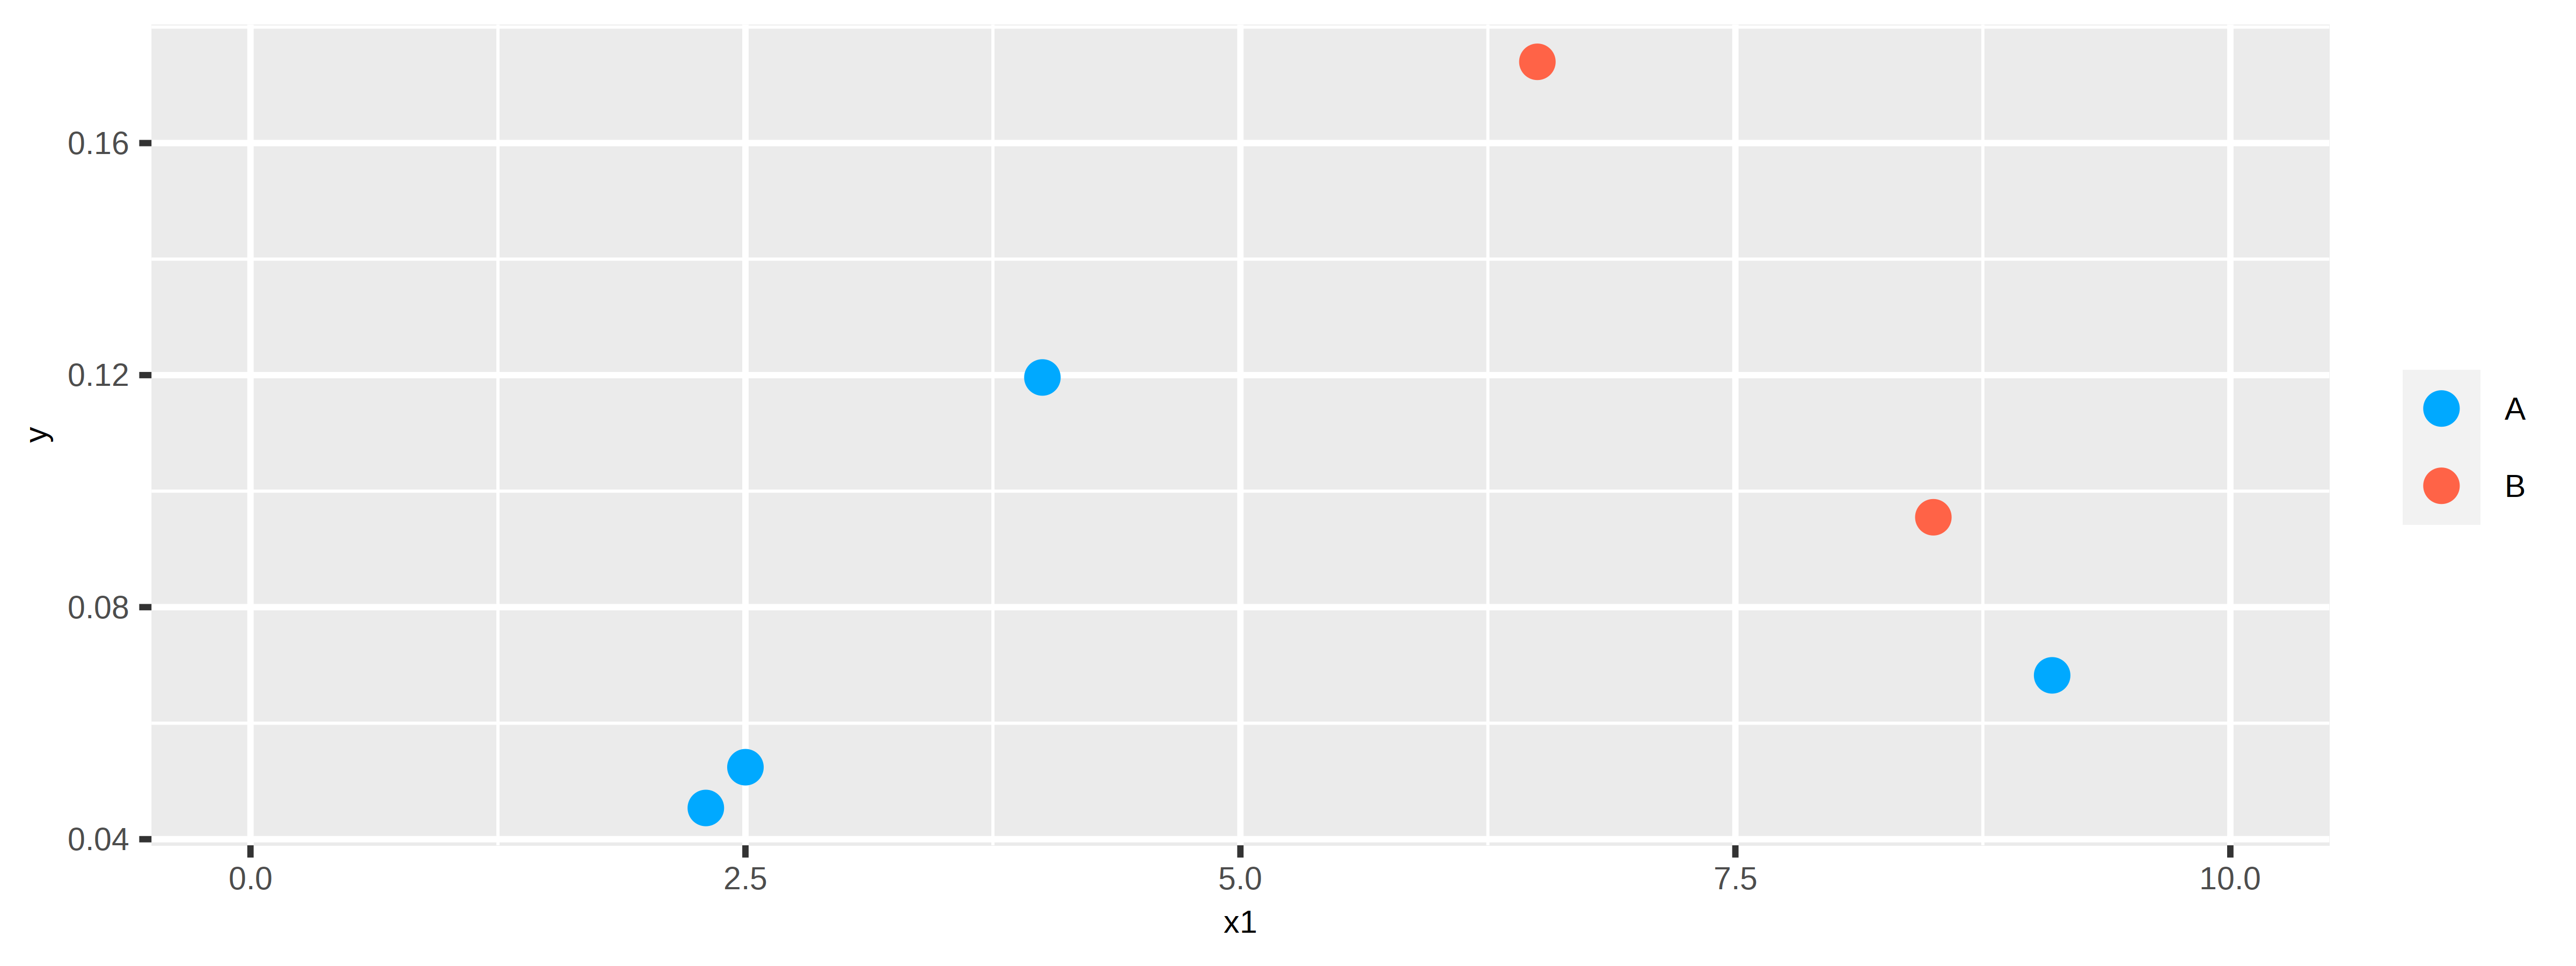

In [12]:
out(8,3)
ggplot(Problem.2) + xlim(0,10) + xlab("x1") + ylab("y") + geom_point(aes(x=x1, y=y, color=class)) 

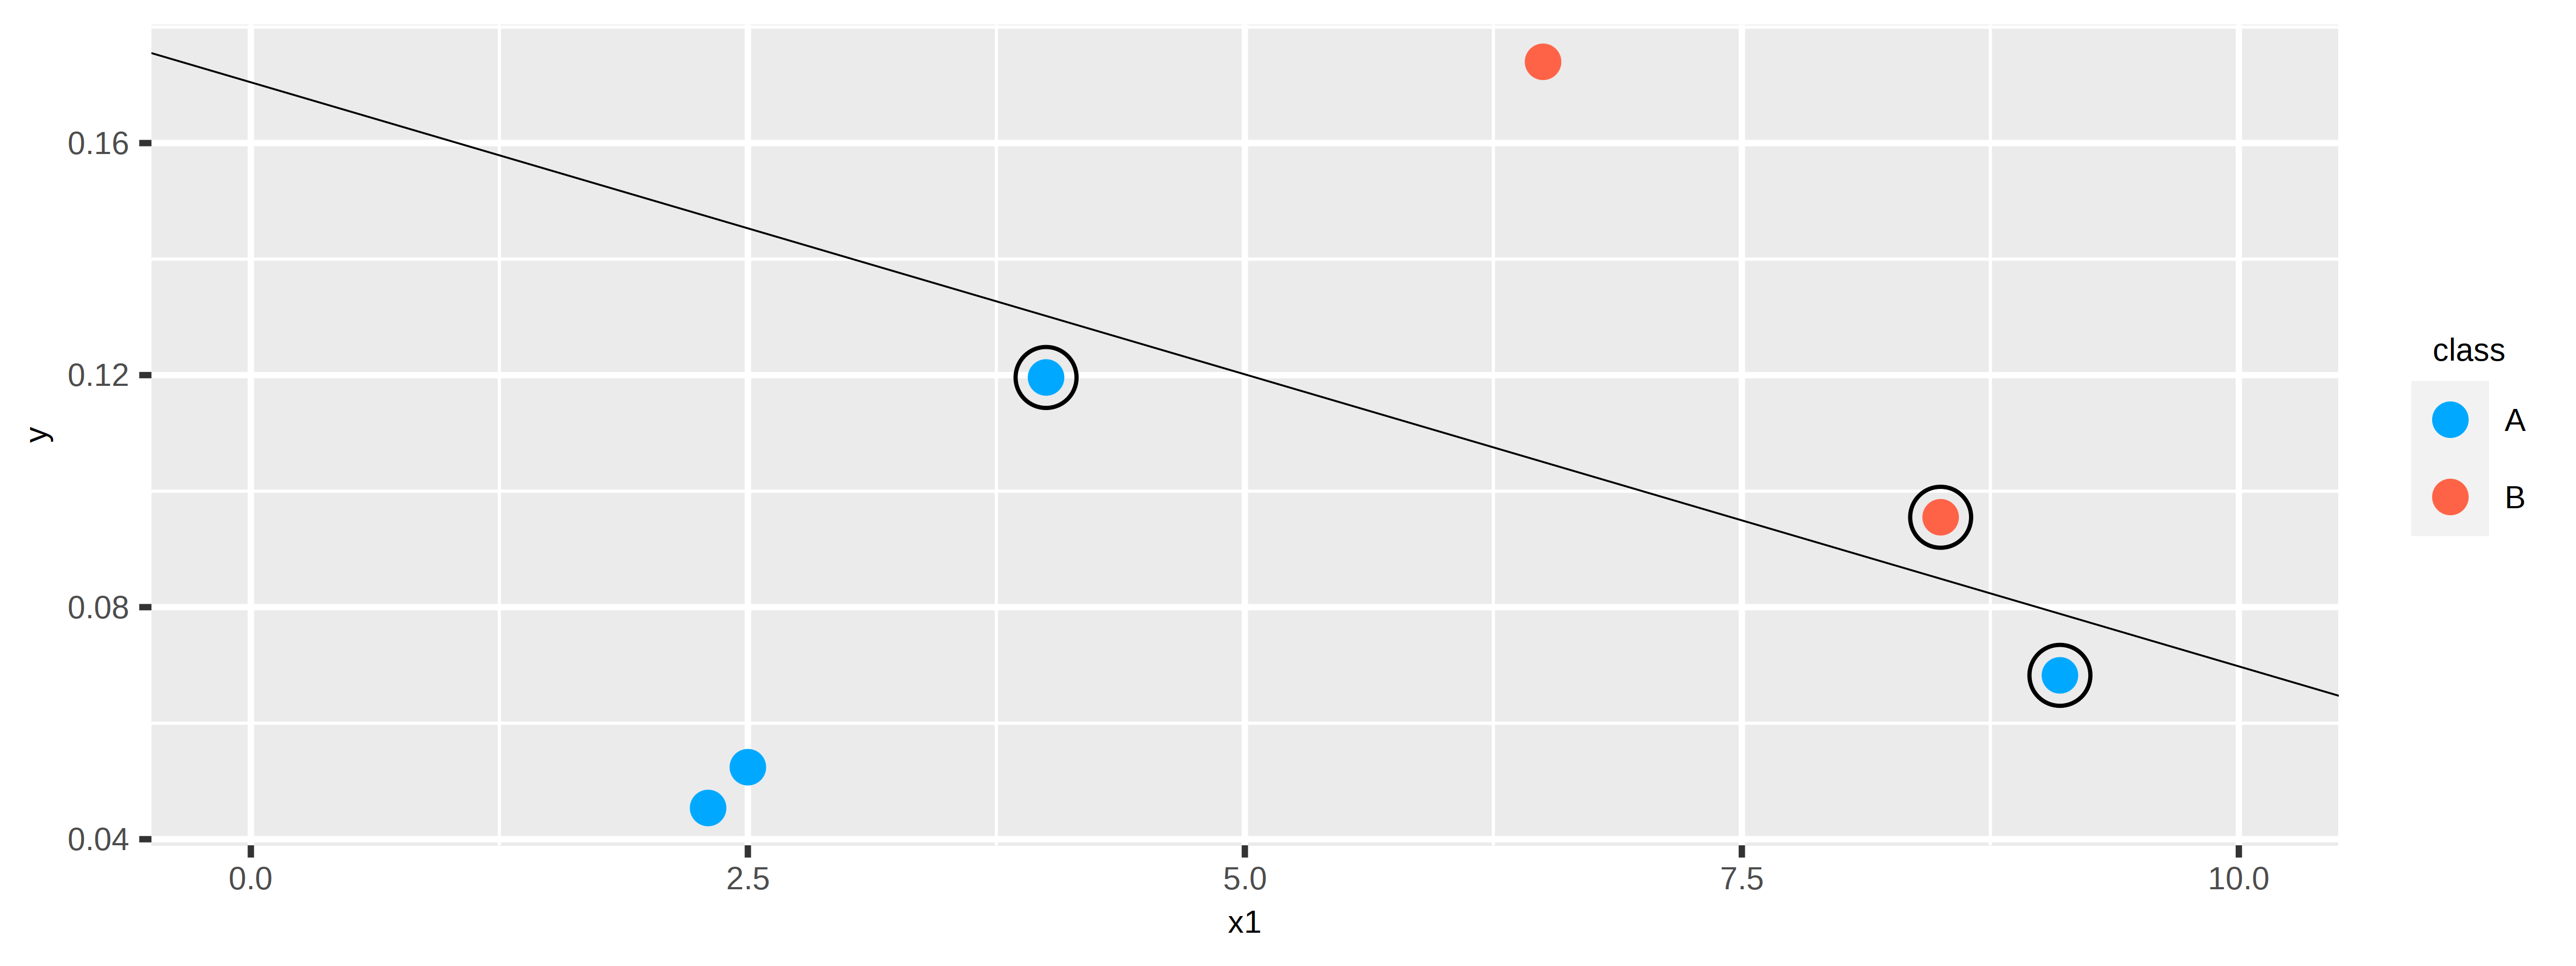

In [13]:
support_vectors.2 = c(4, 8.5, 9.1)

m.2 = (Problem.2$y[6] - Problem.2$y[3]) / (Problem.2$x1[6] - Problem.2$x1[3])
i.upper = -m.2*Problem.2$x1[5]+Problem.2$y[5]
i.lower = -m.2*Problem.2$x1[6]+Problem.2$y[6]
i = mean(c(i.upper, i.lower))

out(8,3)
ggplot(Problem.2) + xlim(0,10) + xlab("x1") + ylab("y") + geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=Problem.2[Problem.2$x1 %in% support_vectors.2,], shape=1, size=6, color="black") +
geom_abline(aes(intercept=i, slope=m.2)) + 
theme.legend_title


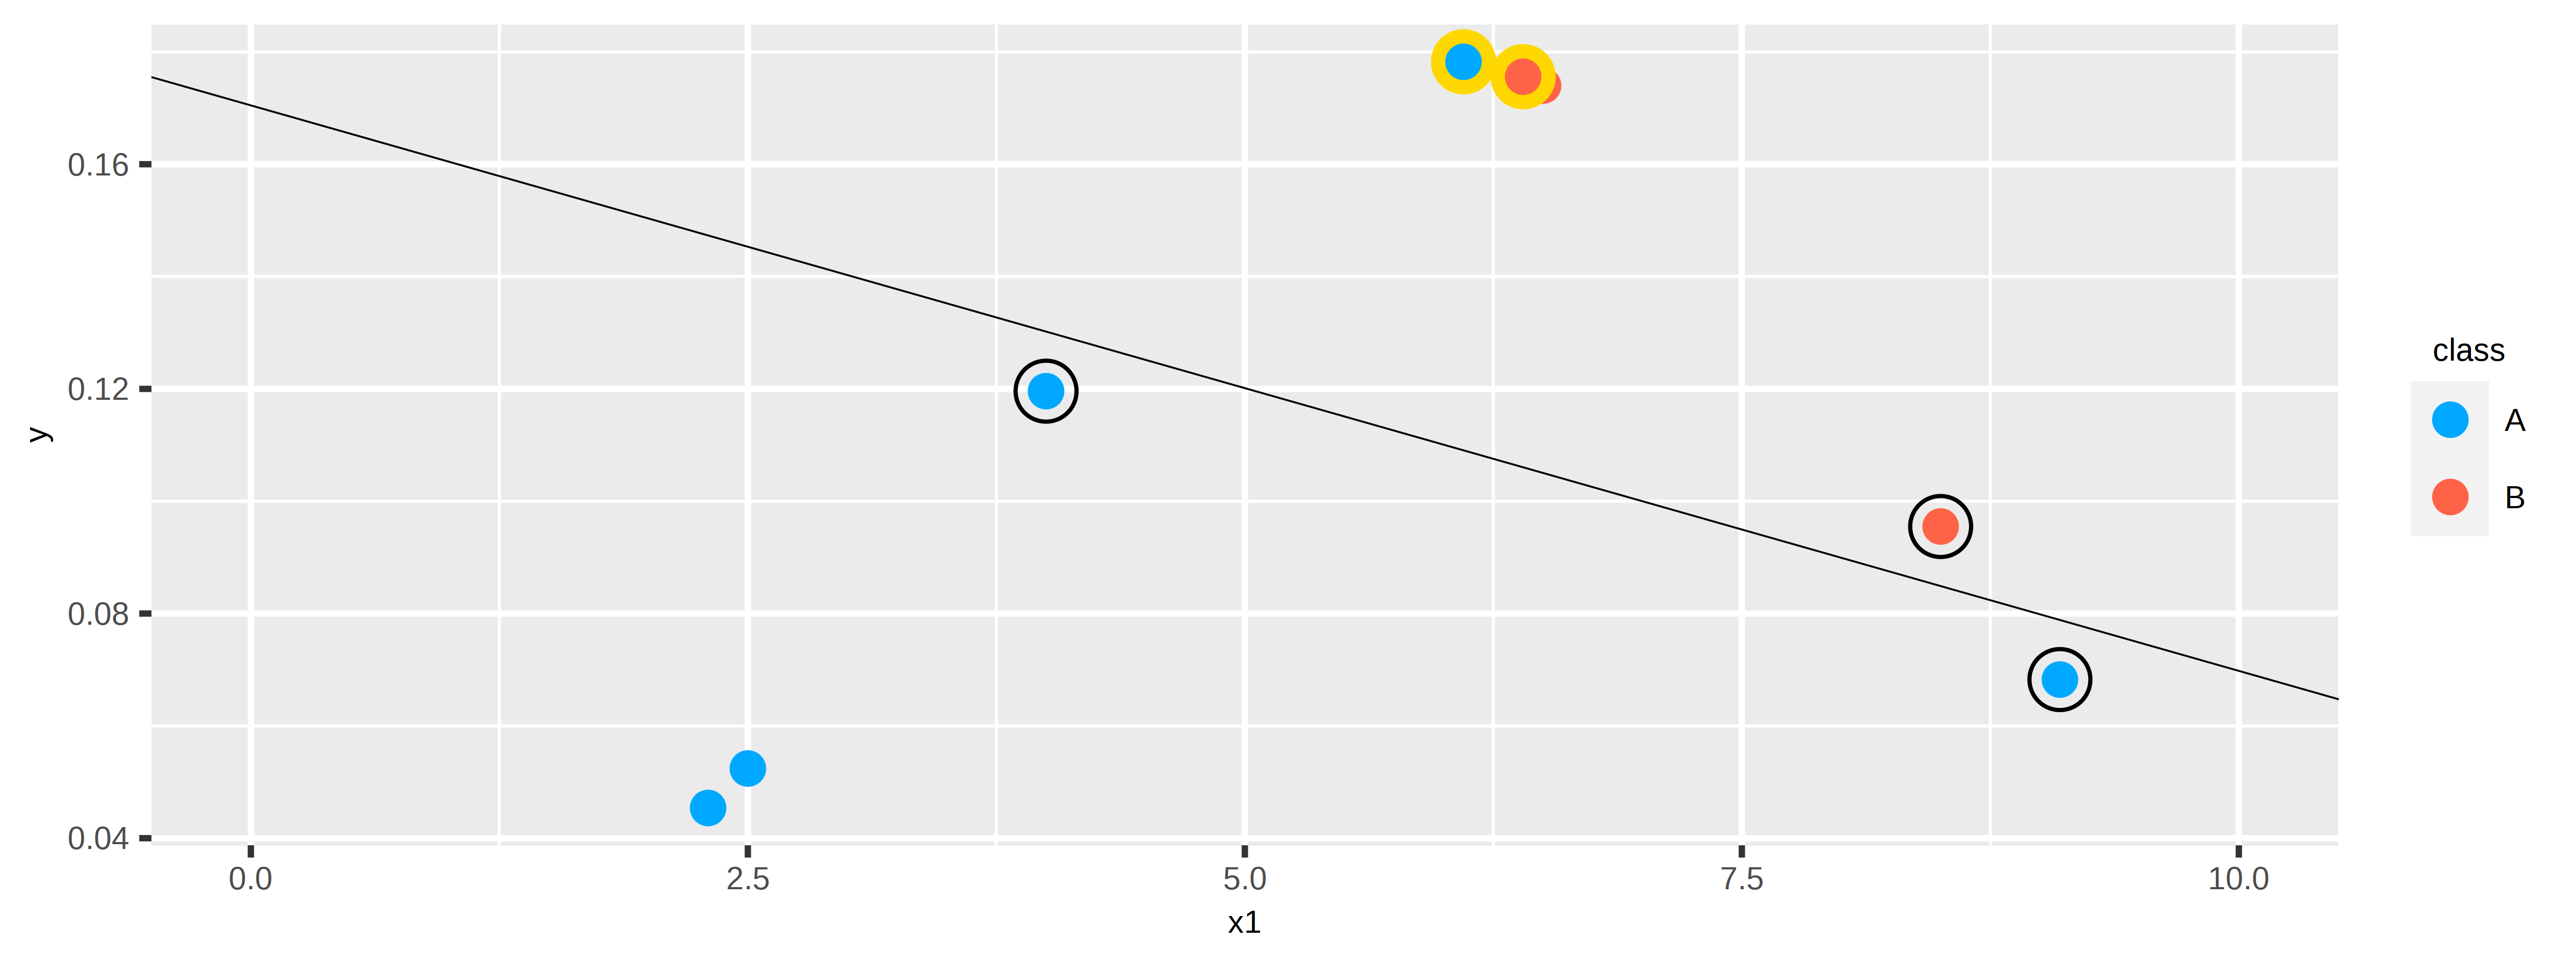

In [14]:
data.score = -(m.2*Problem.2$x1 -1*Problem.2$y + i) / sqrt(m.2^2 + (-1)^2)
new.score = -(m.2*new$x1 -1*new$y + i) / sqrt(m.2^2 + (-1)^2)

out(8,3)
ggplot(Problem.2) + xlim(0,10) + xlab("x1") + ylab("y") + geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=Problem.2[Problem.2$x1 %in% support_vectors.2,], shape=1, size=6, color="black") +

geom_point(aes(x=x1, y=y), data=new, size=6, color="gold") +
geom_point(aes(x=x1, y=y), data=new, color=new_color) +
geom_abline(aes(intercept=i, slope=m.2)) + 

theme.legend_title

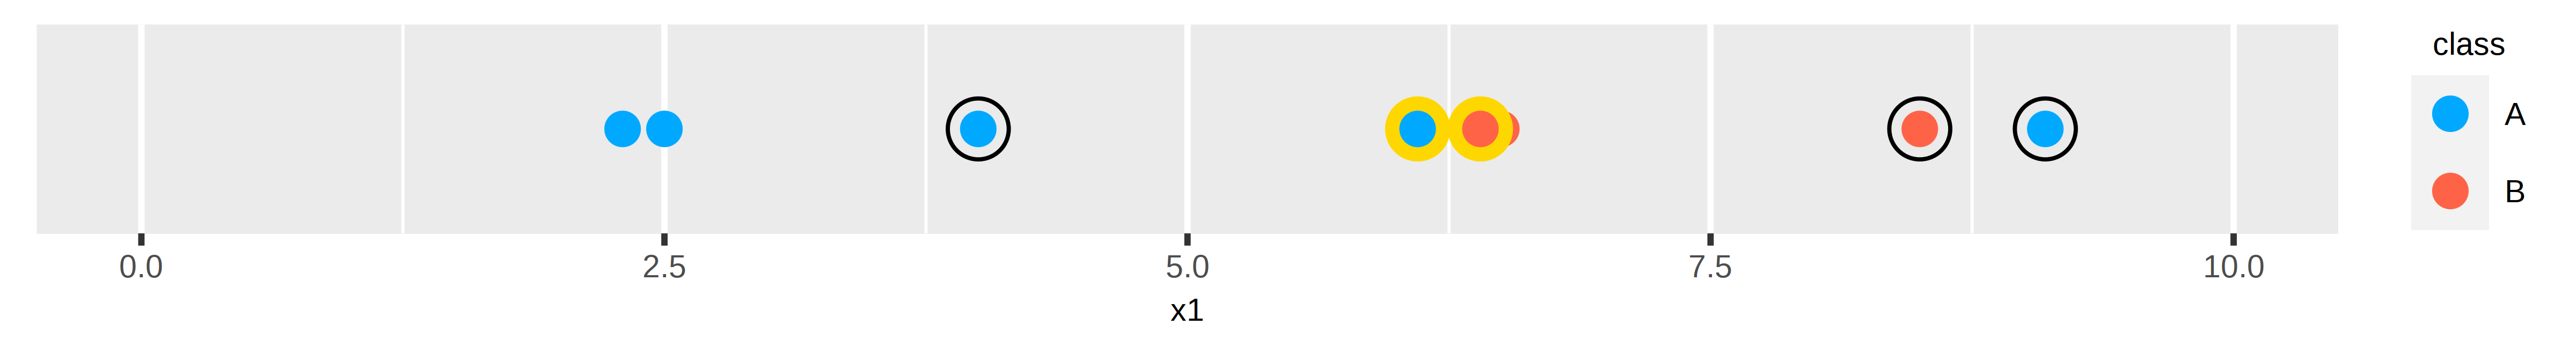

In [15]:
out(8,1.1)
ggplot(Problem.2) + xlim(0,10) + ylim(-.5,.5) + geom_point(aes(x=x1, y=0, color=class)) +
geom_point(aes(x=x1, y=0), data=Problem.2[Problem.2$x1 %in% support_vectors.2,], shape=1, size=6, color="black") +

geom_point(aes(x=x1, y=0), data=new, size=6, color="gold") +
geom_point(aes(x=x1, y=0), data=new, color=new_color) +
 

theme.legend_title + theme.x_axis_only

### Problem 3

Repeat the analysis done in problem 1, except calculate y as the polynomial (x1-6)^2.

In [16]:
x1 = data$x1
y = ((data$x1)-6)^2
class = data$class
Problem.3 = data.frame(x1, y, class)
fmt(Problem.3, "data", row.names=TRUE)

x1 = new$x1
y = ((new$x1)-6)^2
new = data.frame(x1, y)


fmt(new, row.names=TRUE)

,x1,y,class
1,2.3,13.69,A
2,2.5,12.25,A
3,4.0,4.00,A
4,6.5,0.25,B
5,8.5,6.25,B
6,9.1,9.61,A


,x1,y
1,6.1,0.01
2,6.4,0.16


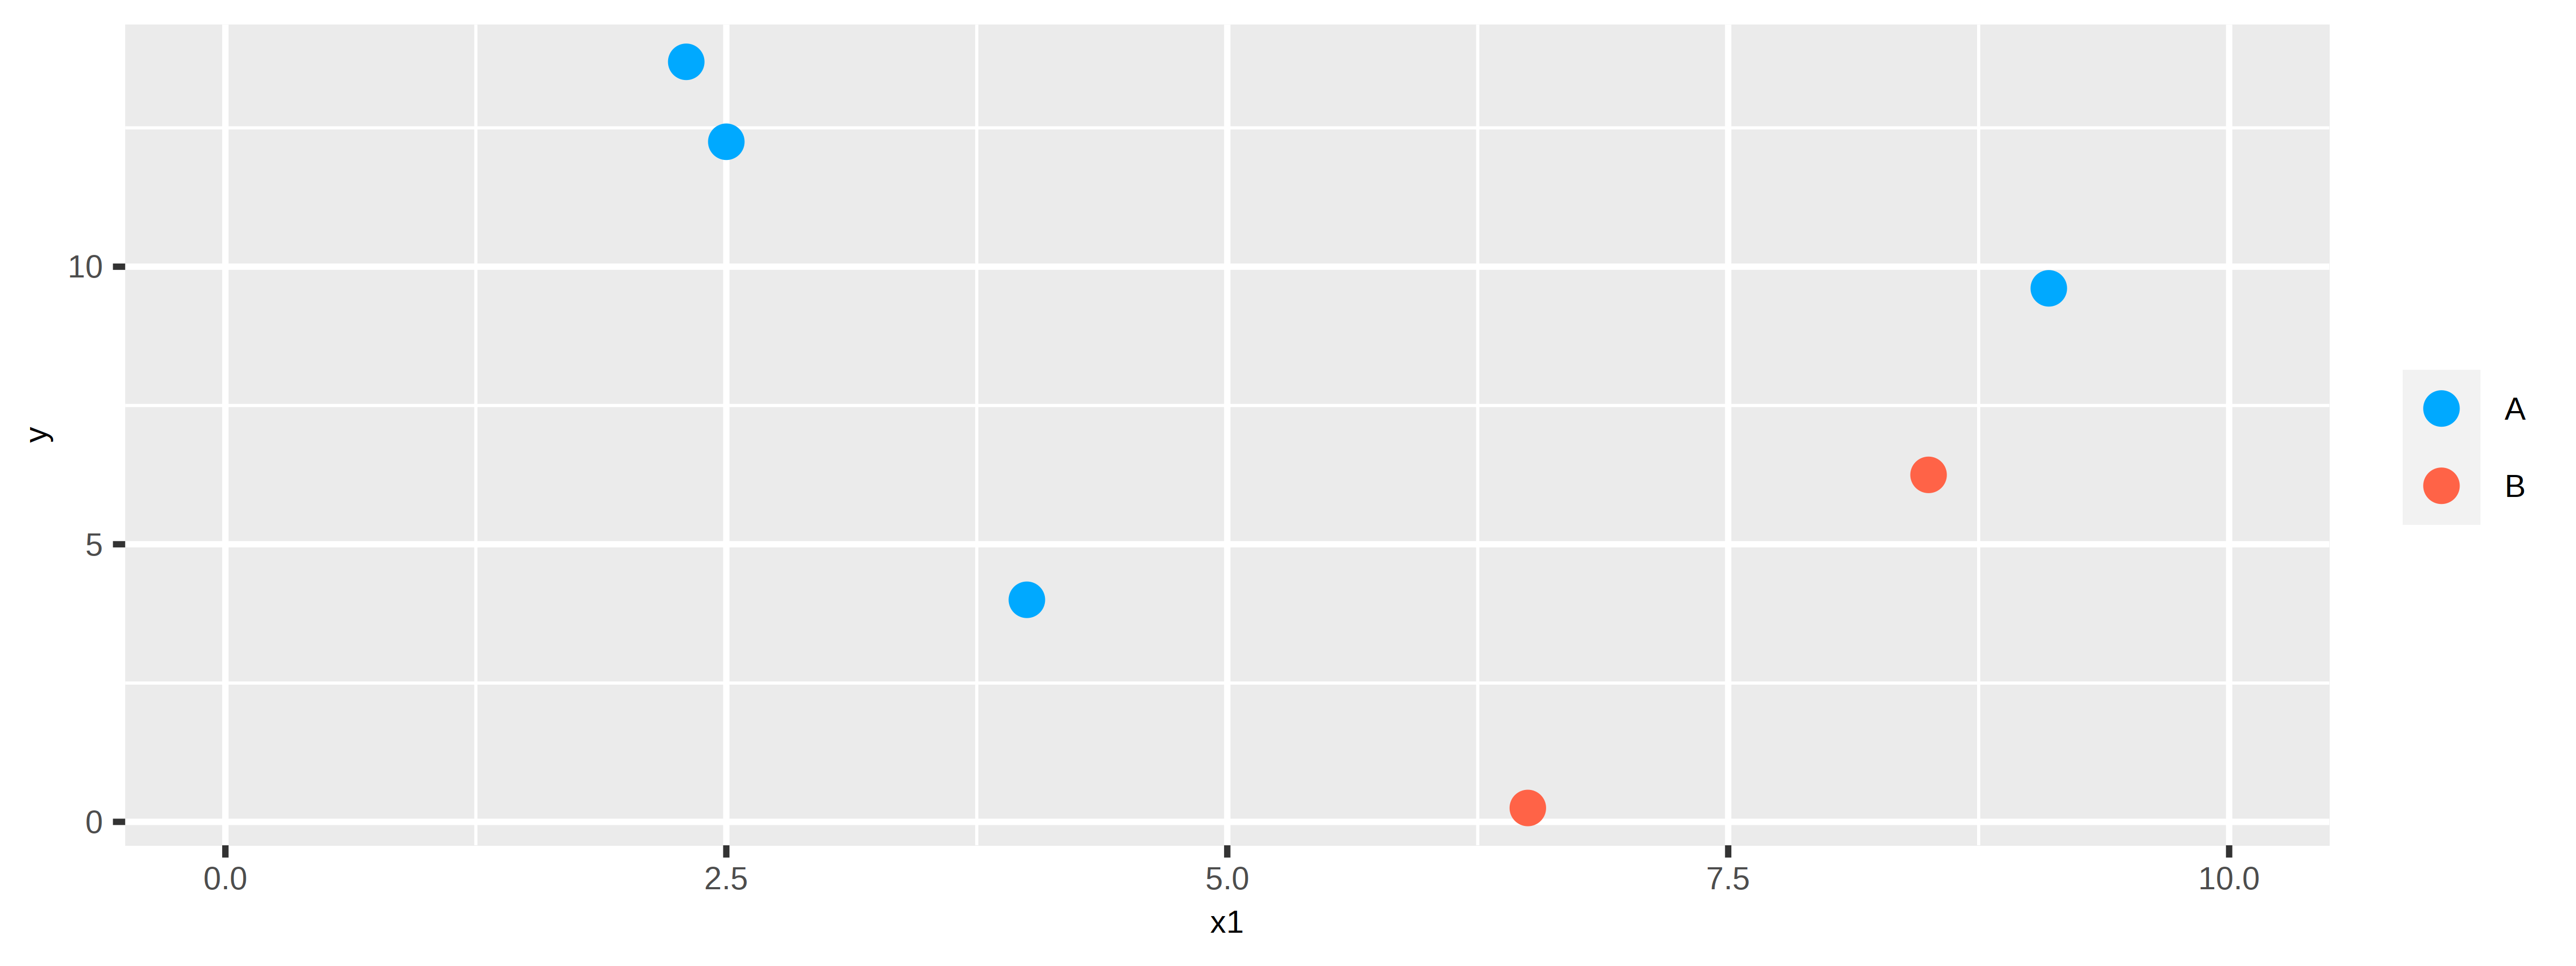

In [17]:
out(8,3)
ggplot(Problem.3) + xlim(0,10) + xlab("x1") + ylab("y") + geom_point(aes(x=x1, y=y, color=class)) 

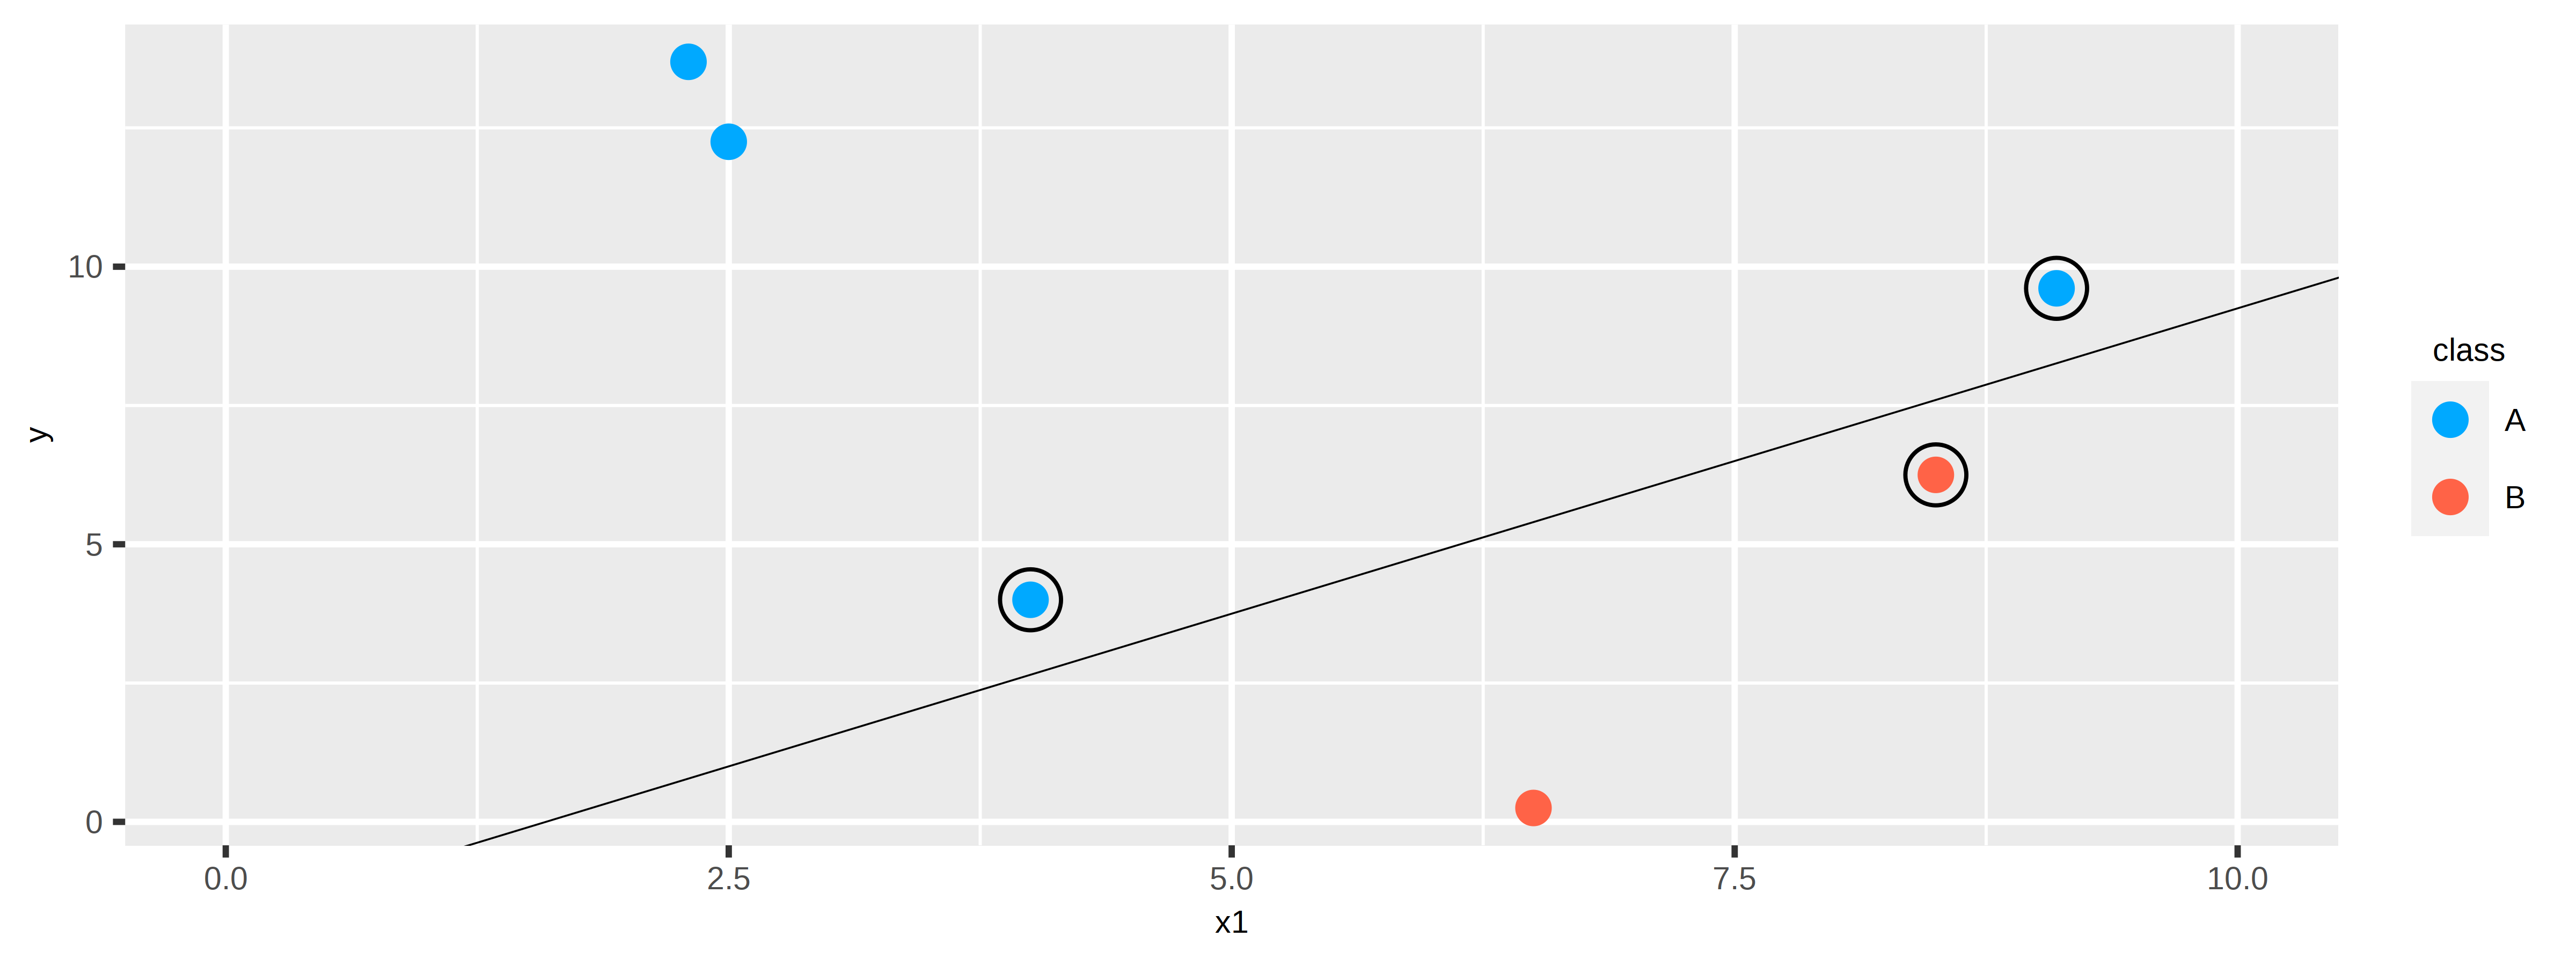

In [18]:
support_vectors.3 = c(4, 8.5, 9.1)

m.3 = (Problem.3$y[6] - Problem.3$y[3]) / (Problem.3$x1[6] - Problem.3$x1[3])
i.upper = -m.3*Problem.3$x1[3]+Problem.3$y[3]
i.lower = -m.3*Problem.3$x1[5]+Problem.3$y[5]
i = mean(c(i.upper, i.lower))
out(8,3)
ggplot(Problem.3) + xlim(0,10) + xlab("x1") + ylab("y") + geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=Problem.3[Problem.3$x1 %in% support_vectors.3,], shape=1, size=6, color="black") +
geom_abline(aes(intercept=i, slope=m.3)) + 
theme.legend_title

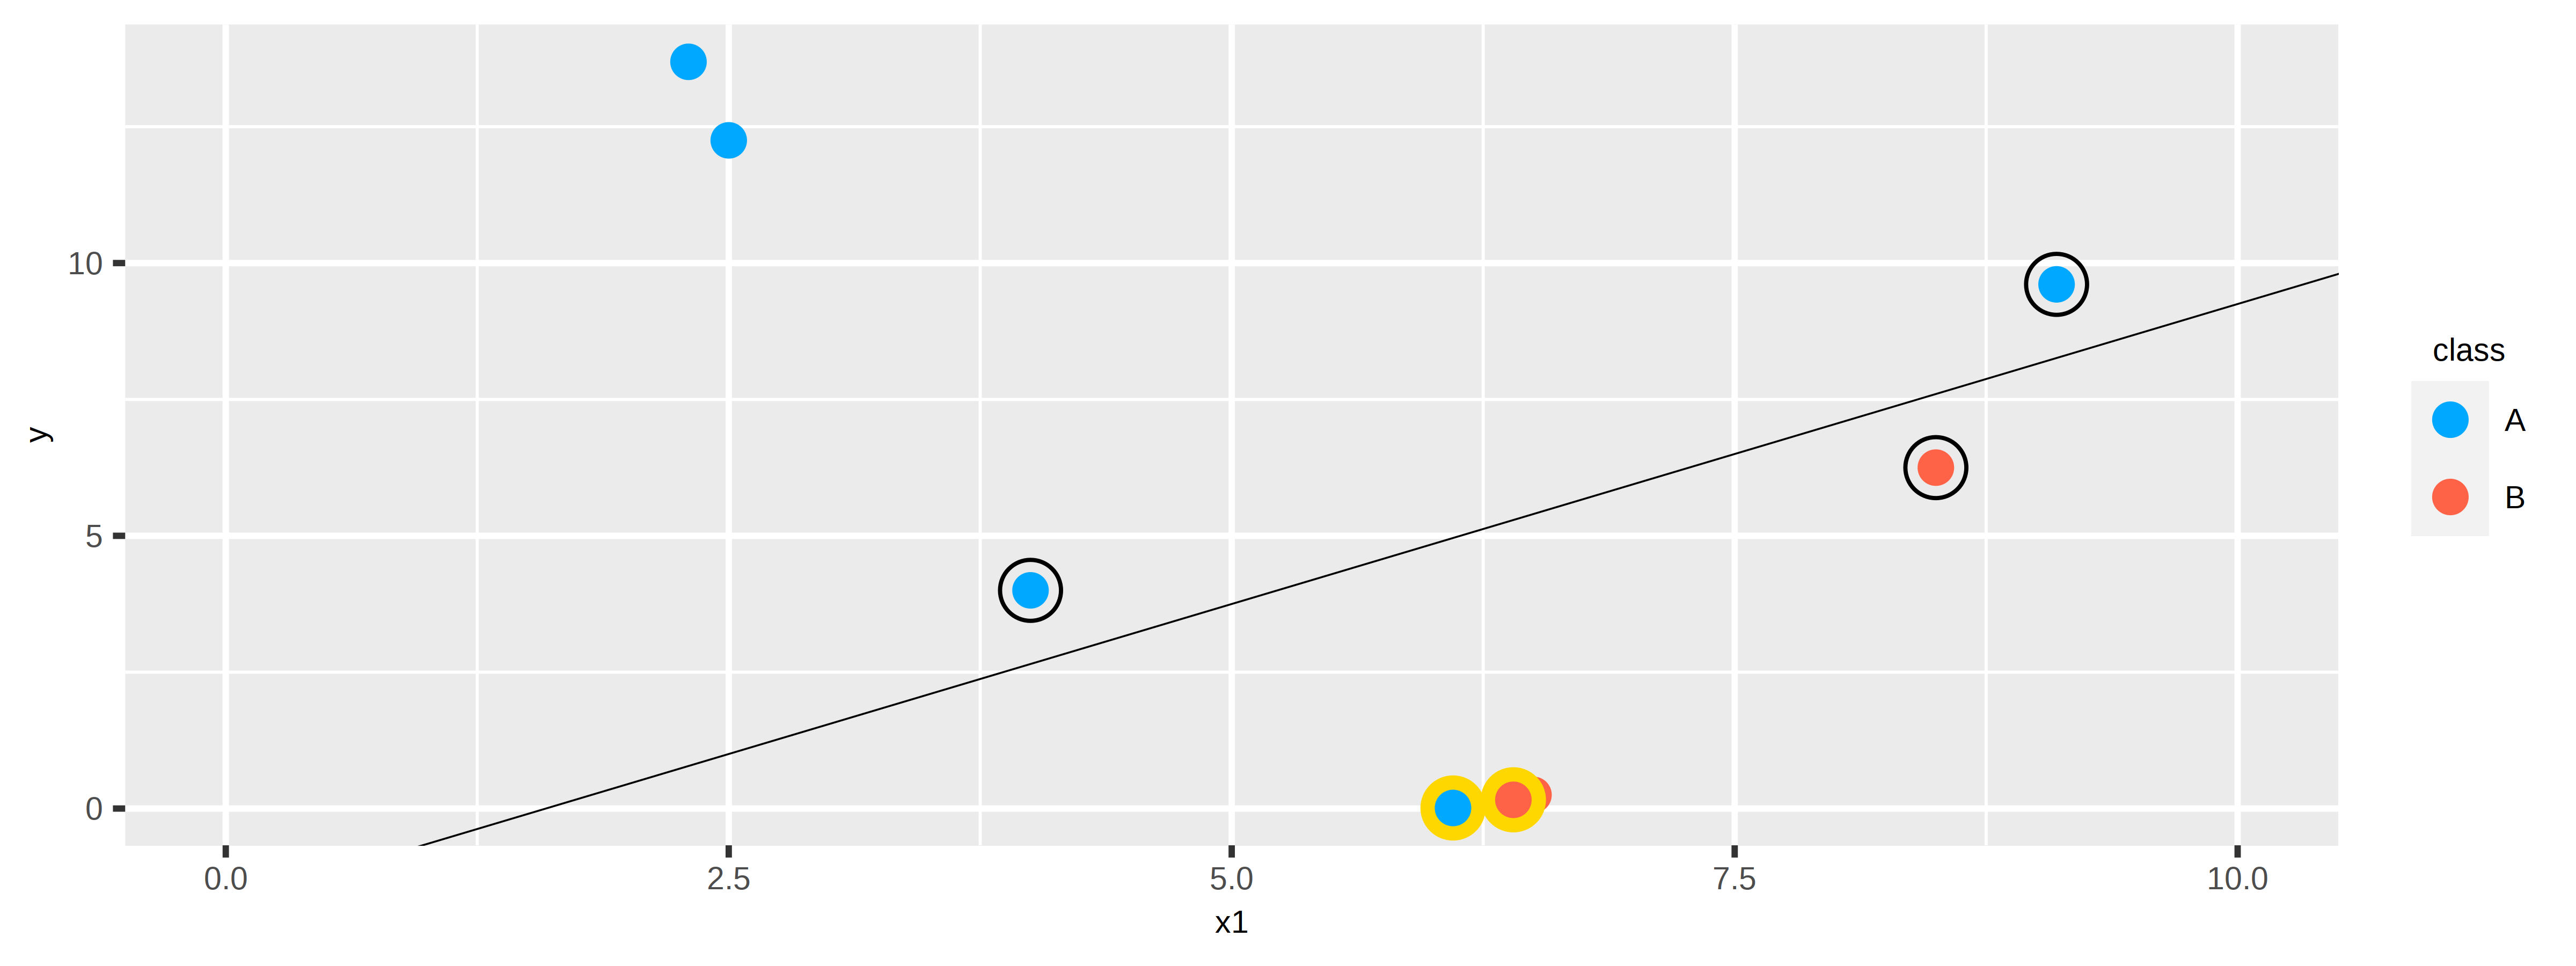

In [19]:
data.score = -(m.3*Problem.3$x1 -1*Problem.3$y + i) / sqrt(m.3^2 + (-1)^2)
new.score = -(m.3*new$x1 -1*new$y + i) / sqrt(m.3^2 + (-1)^2)

out(8,3)
ggplot(Problem.3) + xlim(0,10) + xlab("x1") + ylab("y") + geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=Problem.3[Problem.3$x1 %in% support_vectors.3,], shape=1, size=6, color="black") +

geom_point(aes(x=x1, y=y), data=new, size=6, color="gold") +
geom_point(aes(x=x1, y=y), data=new, color=new_color) +
geom_abline(aes(intercept=i, slope=m.3)) + 

theme.legend_title

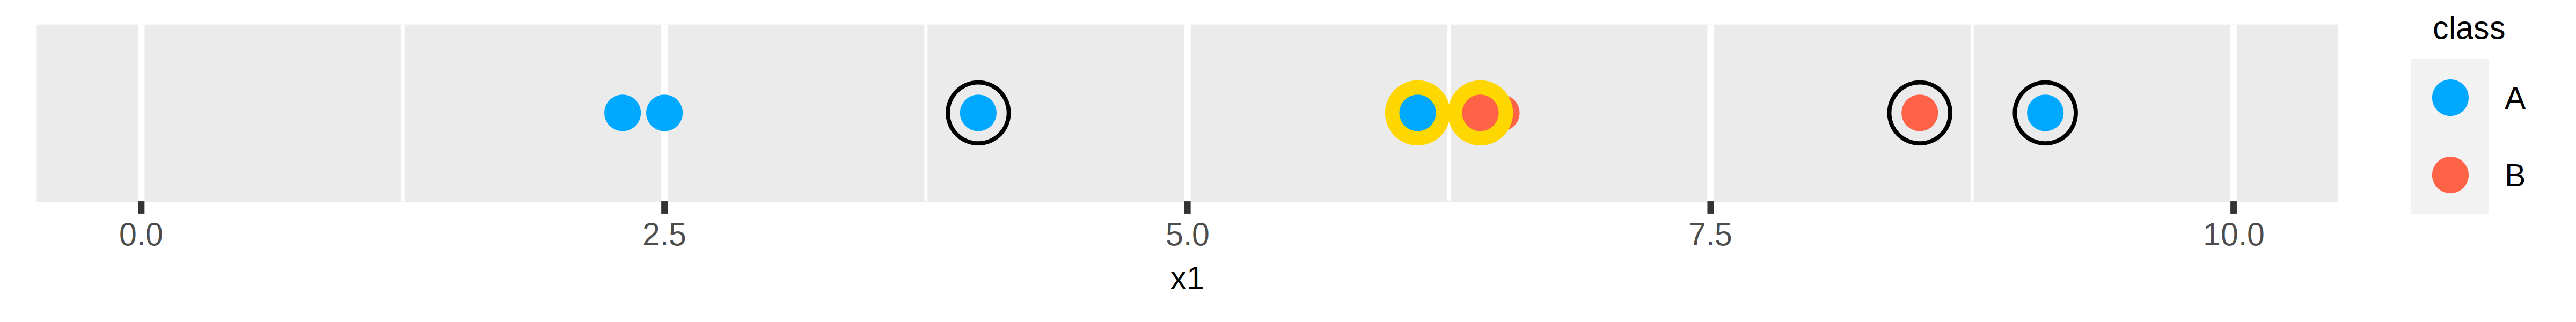

In [20]:
out(8,1)
ggplot(Problem.3) + xlim(0,10) + ylim(-.5,.5) + geom_point(aes(x=x1, y=0, color=class)) +
geom_point(aes(x=x1, y=0), data=Problem.3[Problem.3$x1 %in% support_vectors.3,], shape=1, size=6, color="black") +

geom_point(aes(x=x1, y=0), data=new, size=6, color="gold") +
geom_point(aes(x=x1, y=0), data=new, color=new_color) +
 

theme.legend_title + theme.x_axis_only

## Choice of Cost

### Data

Here is a dataset of 6 classified observations for use in problems 4 and 5.

In [21]:
data.4 = data.frame(x1=c(2.3, 2.5, 4.0, 6.5, 8.5, 9.1), class=factor(c("A", "A", "A", "B",  "B", "A"), levels=c("A","B")))
fmt(data.4, "data")

x1,class
2.3,A
2.5,A
4.0,A
6.5,B
8.5,B
9.1,A


### Problem 4

Construct an SVM classifier trained on the classified dataset with these hyper-parameter settings:<br>
`type="C-classification"`, `kernel="radial"`, `gamma=1`, `scale=TRUE`, `cost=1`.  

Determine the classifier's in-sample class probabilities, predicted classes (cutoff=0.5 for class A), confusion matrix, true positive rate (positive is class A), and accuracy. 

You may want to use these function(s):
* set.seed()
* svm()
* attr()
* predict()
* confusionMatrix()
* fmt()
* fmt.cm()

Use `set.seed(0)` and `svm(...)` together to ensure consistency in the class probabilities.
Use `svm(class~x1, ..., probability=TRUE)` to ensure class probabilities are calculated.
Use `attr(predict(..., ..., probability=TRUE), "probabilities")` to get the calculated class probabilities.

In [22]:
set.seed(0)

model = svm(class ~ x1, data.4, probability=TRUE, type="C-classification", kernel="radial", gamma=1, scale=TRUE, cost=1)
prob = attr(predict(model, data.4, probability=TRUE), "probabilities")
class.predicted = as.class(prob, class="A", cutoff=0.5)
Problem4.2 = data.frame(data.4)
CM = confusionMatrix(class.predicted, data$class)$table
cm = CM/sum(CM)
accuracy = cm[1,1]+cm[2,2]
tpr = cm[1,1]/(cm[1,1]+cm[2,1])

fmt(prob)
fmt(Problem4.2, "data")
fmt.cm(cm)
fmt(data.frame(kernel= "radial", gamma= "1", scale= "TRUE", cost= "1", tpr, accuracy),NA)

A,B
0.4657822,0.5342178
0.4580600,0.5419400
0.5052255,0.4947745
0.8169062,0.1830938
0.7965387,0.2034613
0.7508560,0.2491440


x1,class
2.3,A
2.5,A
4.0,A
6.5,B
8.5,B
9.1,A


,A,B
A,0.3333333,0.3333333
B,0.3333333,0.0000000


kernel,gamma,scale,cost,tpr,accuracy
radial,1,TRUE,1,0.5,0.3333333


### Problem 5

Repeat the analyis done in problem 4, except instead try cost 0.01, 0.1, 1, 10, and 100 (use set.seed(0) for each try).  Record the true positive rate and accuracy of each classifier in a table.

In [23]:
set.seed(0)
model1 = svm(class ~ x1, data.4, probability=TRUE, type="C-classification", kernel="radial", gamma=1, scale=TRUE, cost=.01)
prob1 = attr(predict(model1, data.4, probability=TRUE), "probabilities")
class.predicted1 = as.class(prob1, class="A", cutoff=0.5)
CM1 = confusionMatrix(class.predicted1, data.4$class)$table
cm1 = CM1/sum(CM1)
A1 = cm1[1,1]+cm1[2,2]
tpr1 = cm1[1,1]/(cm1[1,1]+cm1[2,1])

set.seed(0)
model2 = svm(class ~ x1, data.4, probability=TRUE, type="C-classification", kernel="radial", gamma=1, scale=TRUE, cost=.1)
prob2 = attr(predict(model2, data.4, probability=TRUE), "probabilities")
class.predicted2 = as.class(prob2, class="A", cutoff=0.5)
CM2 = confusionMatrix(class.predicted2, data.4$class)$table
cm2 = CM2/sum(CM2)
A2 = cm2[1,1]+cm2[2,2]
tpr2 = cm2[1,1]/(cm2[1,1]+cm2[2,1])

set.seed(0)
model = svm(class ~ x1, data.4, probability=TRUE, type="C-classification", kernel="radial", gamma=1, scale=TRUE, cost=1)
prob = attr(predict(model, data.4, probability=TRUE), "probabilities")
class.predicted = as.class(prob, class="A", cutoff=0.5)
CM = confusionMatrix(class.predicted, data$class)$table
cm = CM/sum(CM)
A3 = cm[1,1]+cm[2,2]
tpr3 = cm[1,1]/(cm[1,1]+cm[2,1])

set.seed(0)
model4 = svm(class ~ x1, data.4, probability=TRUE, type="C-classification", kernel="radial", gamma=1, scale=TRUE, cost=10)
prob4 = attr(predict(model4, data.4, probability=TRUE), "probabilities")
class.predicted4 = as.class(prob4, class="A", cutoff=0.5)
CM4 = confusionMatrix(class.predicted4, data.4$class)$table
cm4 = CM4/sum(CM4)
A4 = cm4[1,1]+cm4[2,2]
tpr4 = cm4[1,1]/(cm4[1,1]+cm4[2,1])

set.seed(0)
model5 = svm(class ~ x1, data.4, probability=TRUE, type="C-classification", kernel="radial", gamma=1, scale=TRUE, cost=100)
prob5 = attr(predict(model5, data.4, probability=TRUE), "probabilities")
class.predicted5 = as.class(prob5, class="A", cutoff=0.5)
CM5 = confusionMatrix(class.predicted5, data.4$class)$table
cm5 = CM5/sum(CM5)
A5 = cm5[1,1]+cm5[2,2]
tpr5 = cm5[1,1]/(cm5[1,1]+cm5[2,1])

tune = data.frame(model=c(1,2,3,4,5), kernel="radial", gamma="1", scale="TRUE", cost=c(0.01,0.10,1.00,10.00,100.00),
                 tpr=c(tpr1,tpr2,tpr3,tpr4,tpr5), accuracy=c(A1,A2,A3,A4,A5))
fmt(tune)


model,kernel,gamma,scale,cost,tpr,accuracy
1,radial,1,TRUE,0.01,1.00,0.6666667
2,radial,1,TRUE,0.10,0.25,0.1666667
3,radial,1,TRUE,1.00,0.50,0.3333333
4,radial,1,TRUE,10.00,1.00,0.8333333
5,radial,1,TRUE,100.00,1.00,0.8333333


<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised February 28, 2022
</span>
</p>
</font>